# Phenylacetic Acid (PAA) concentration Analysis

# Interactive Plotting
## Trend Analysis: Parameter of Interest vs. Time

In [1]:
import pandas as pd
import os
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import seaborn as sns
import matplotlib.pyplot as plt

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Load all batches into a single DataFrame
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch ID'] = i
    # Drop rows with missing values in the specified column
    df.dropna(subset=['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'], inplace=True)
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Calculate statistical information for each batch
stats = []
for i in range(61, 91):
    df = all_batches_df[all_batches_df['Batch ID'] == i]
    mean_1 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].mean()
    median_1 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].median()
    std_1 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].std()
    min_1 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].min()
    max_1 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].max()
    mode_1 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].mode()
    mode_1_value = mode_1.iloc[0] if not mode_1.empty else None
    Q1 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].quantile(0.25)
    Q3 = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].quantile(0.75)
    IQR = Q3 - Q1

    stats.append({
        'Batch': i,
        'Mean': mean_1,
        'Median': median_1,
        'Mode': mode_1_value,
        'Std Dev': std_1,
        'Min': min_1,
        'Max': max_1,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    })
stats_df = pd.DataFrame(stats)

# Merge stats with the main DataFrame for hover info
all_batches_df = all_batches_df.merge(stats_df, left_on='Batch ID', right_on='Batch')

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("PAA Concentration Analysis", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[1],
        multi=True,
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Graph(id='line-plot', style={'height': '60vh'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks')]
)
def show_all_batches(n_clicks):
    if n_clicks > 0:
        return [i for i in range(61, 91)]
    return [1]

@app.callback(
    Output('line-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_line_plot(selected_batches):
    filtered_df = all_batches_df[all_batches_df['Batch ID'].isin(selected_batches)]
    fig = px.line(filtered_df, x='Time (h)', y='PAA concentration offline(PAA_offline:PAA (g L^{-1}))', color='Batch ID',
                  title='PAA Concentration Over Time',
                  hover_data={
                      'Mean': True, 'Median': True, 'Mode': True,
                      'Std Dev': True, 'Min': True, 'Max': True,
                      'Q1': True, 'Q3': True, 'IQR': True
                  })

    fig.update_layout(
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


## Statistical Analysis & Distribution Plotting (Static) for Each Batch "Separately" 
### Batches 61-90: Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy

In [2]:
import os
import pandas as pd

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Initialize an empty list to store DataFrames for each batch
batch_dfs = []

# Iterate over batch numbers
for i in range(61, 91):
    # Construct the file path for the current batch
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values in the specified column
    df.dropna(subset=[par], inplace=True)
    
    # Calculate statistical values of the "Parameter of Interest" column
    mean_1 = df[par].mean()
    median_1 = df[par].median()
    std_1 = df[par].std()
    min_1 = df[par].min()
    max_1 = df[par].max()
    mode_1 = df[par].mode()
    mode_1_value = mode_1.iloc[0] if not mode_1.empty else None
    Q1 = df[par].quantile(0.25)
    Q3 = df[par].quantile(0.75)
    IQR = Q3 - Q1

    # Create a DataFrame with statistical values for the current batch
    batch_summary_df = pd.DataFrame({
        'Batch': [i], 
        f'Mean_{par}': [mean_1], 
        f'Median_{par}': [median_1], 
        f'Mode_{par}': [mode_1_value], 
        f'Std_{par}': [std_1], 
        f'Min_{par}': [min_1], 
        f'Max_{par}': [max_1], 
        f'Q1_{par}': [Q1], 
        f'Q3_{par}': [Q3], 
        f'IQR_{par}': [IQR]
    })

    # Append the DataFrame to the list
    batch_dfs.append(batch_summary_df)

# Concatenate all DataFrames in the list into a single DataFrame
stats_1 = pd.concat(batch_dfs, ignore_index=True)

# Display the summary DataFrame
stats_1


,Batch,Mean_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Median_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Mode_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Std_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Min_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Max_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Q1_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Q3_PAA concentration offline(PAA_offline:PAA (g L^{-1})),IQR_PAA concentration offline(PAA_offline:PAA (g L^{-1}))
0,61,1226.754545,1199.75,1199.4,88.713019,1193.1,1541.8,1199.150,1201.050,1.900
1,62,1221.838095,1200.30,1200.6,73.390779,1185.1,1484.7,1199.000,1200.600,1.600
2,63,1227.247619,1199.50,1199.3,86.546858,1197.7,1540.1,1198.800,1200.600,1.800
3,64,1229.714286,1199.80,1198.8,94.444017,1197.1,1575.4,1199.300,1200.700,1.400
4,65,1218.838095,1199.30,1199.0,64.523286,1192.0,1452.9,1198.700,1200.300,1.600
5,66,1237.409524,1199.70,1198.1,107.143403,1197.9,1597.9,1198.900,1201.100,2.200
6,67,1233.306667,1199.50,1199.5,91.441070,1192.7,1502.9,1199.000,1200.600,1.600
7,68,1217.990476,1199.60,1198.3,61.861789,1189.3,1445.7,1198.300,1201.300,3.000
8,69,1224.520000,1199.10,1199.0,80.072175,1193.9,1503.7,1198.775,1201.450,2.675
9,70,1218.647619,1199.90,1200.0,62.784836,1190.0,1448.3,1198.800,1200.200,1.400


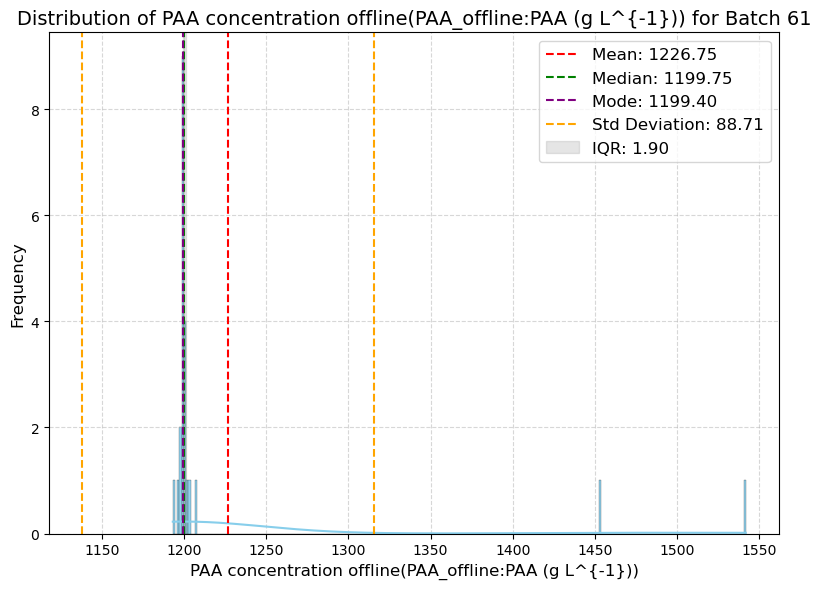

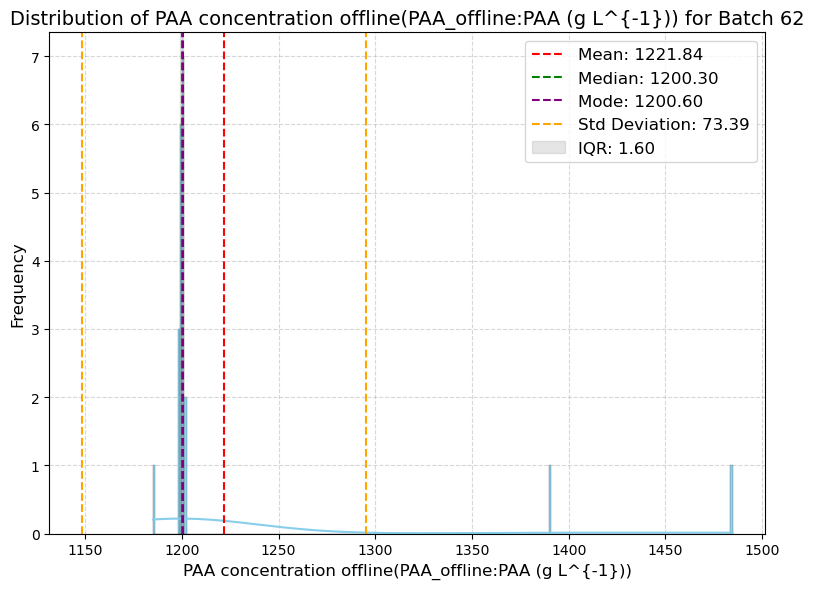

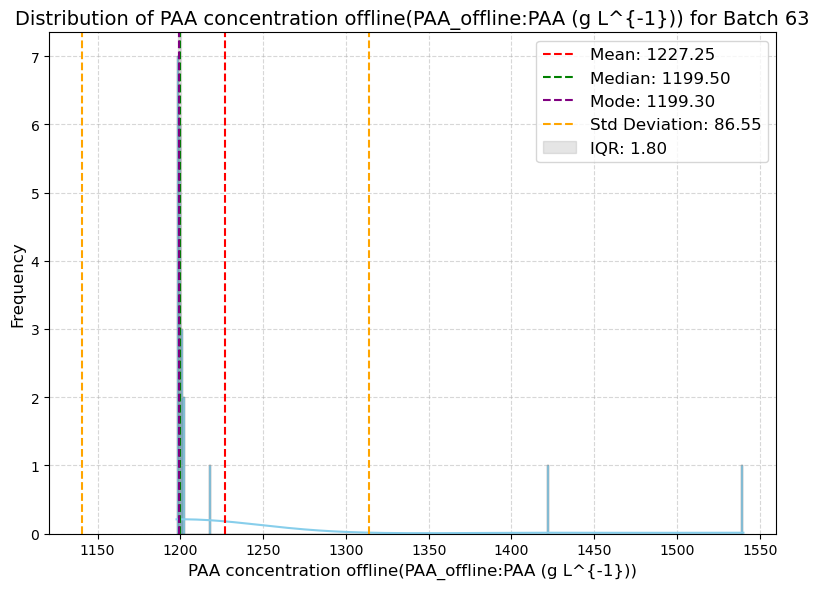

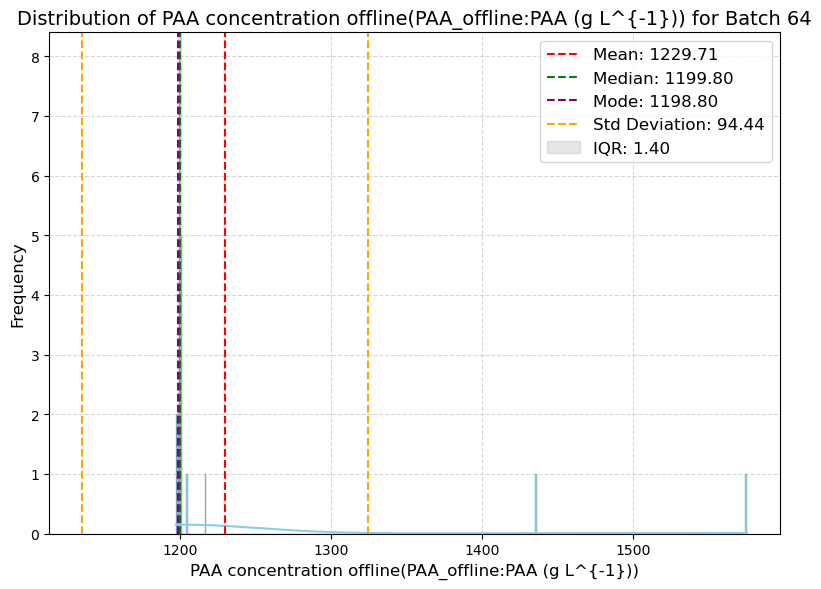

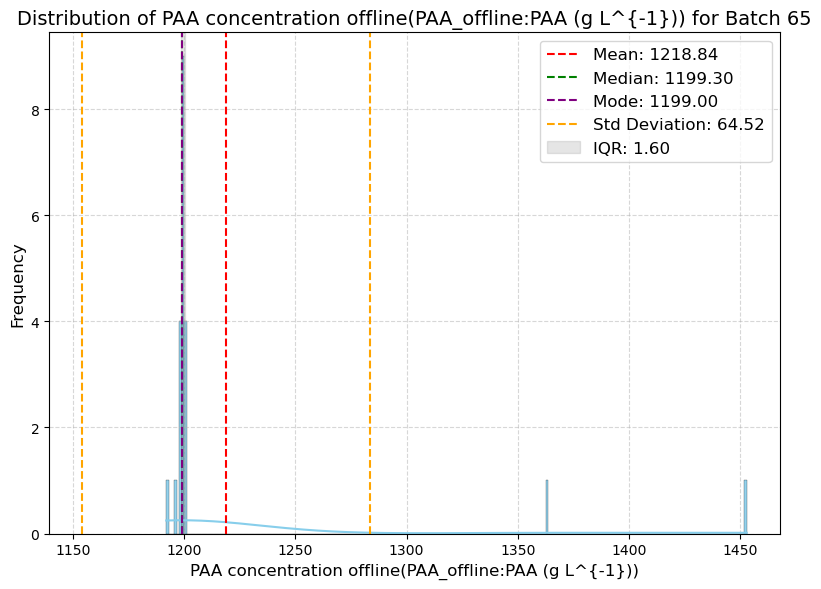

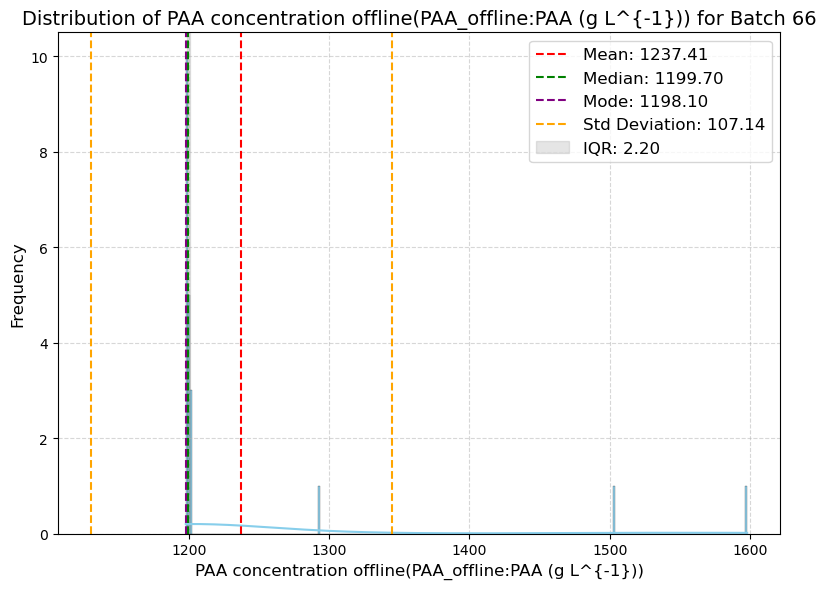

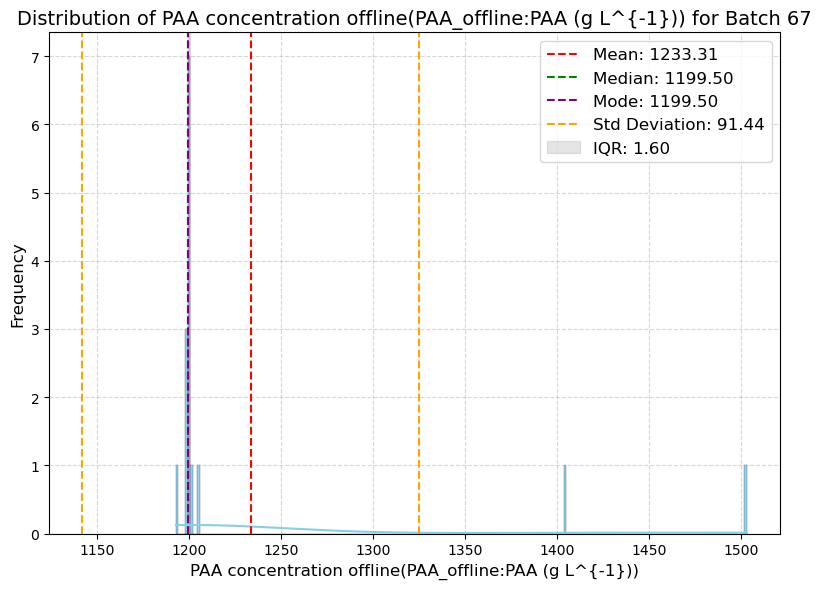

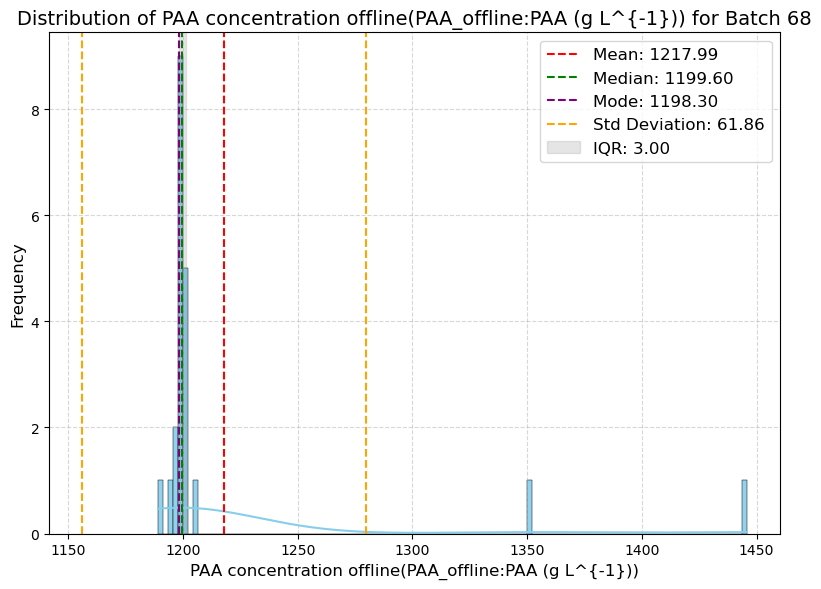

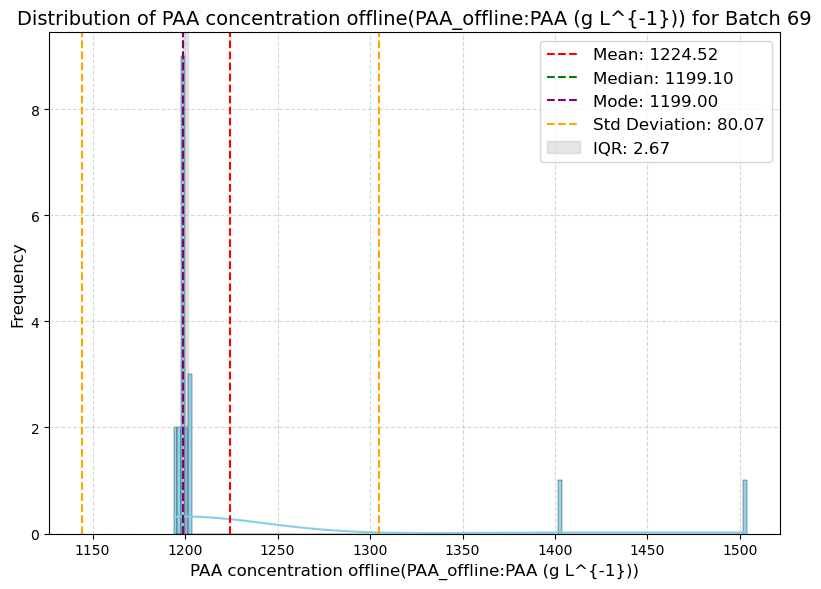

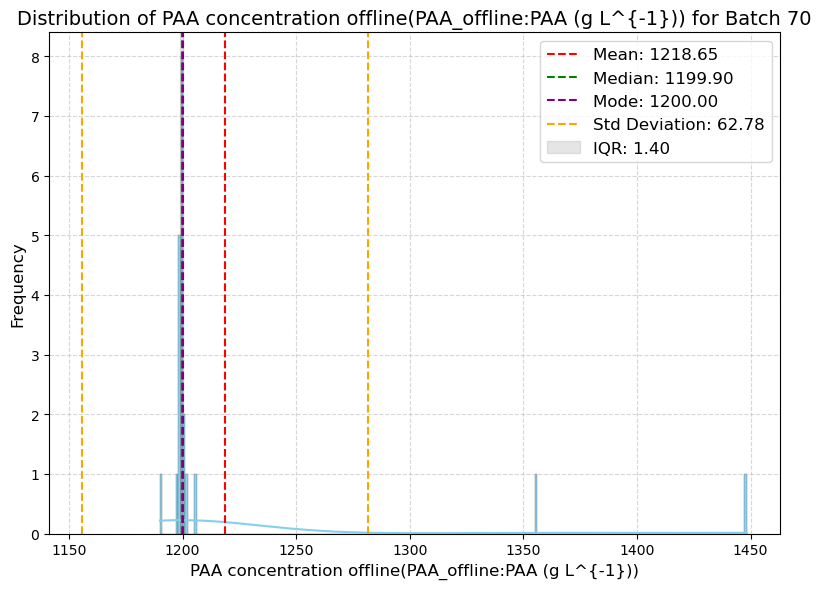

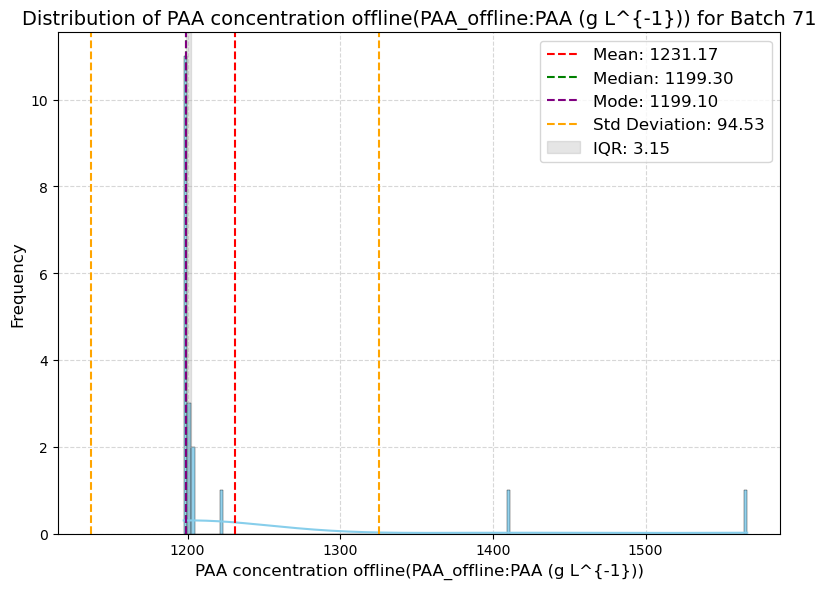

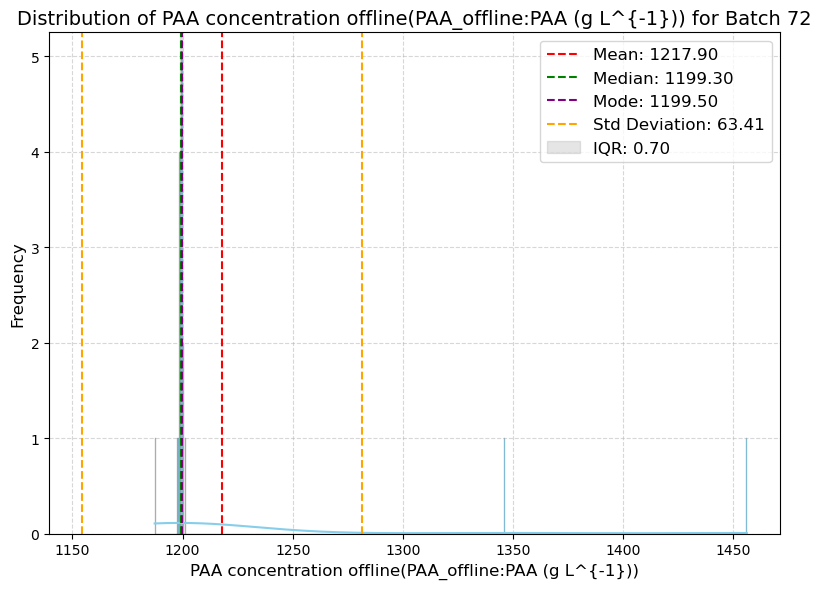

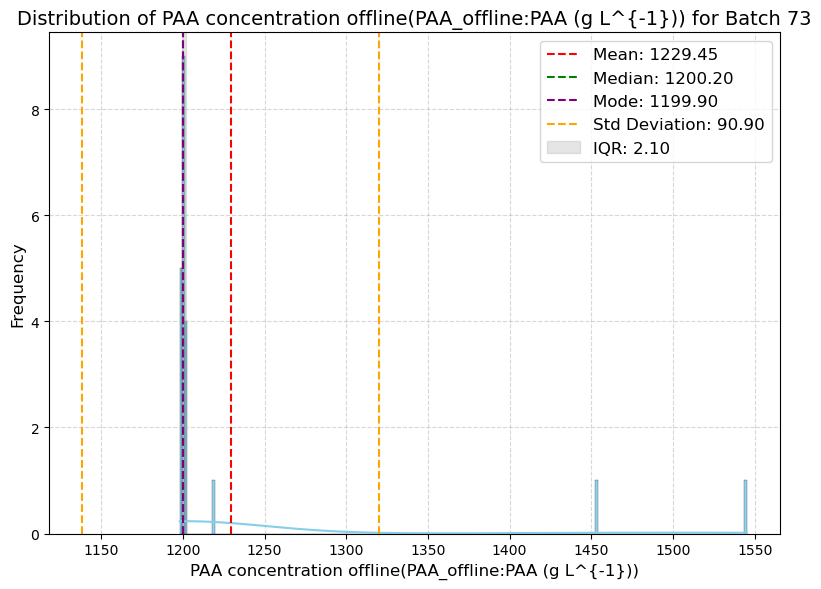

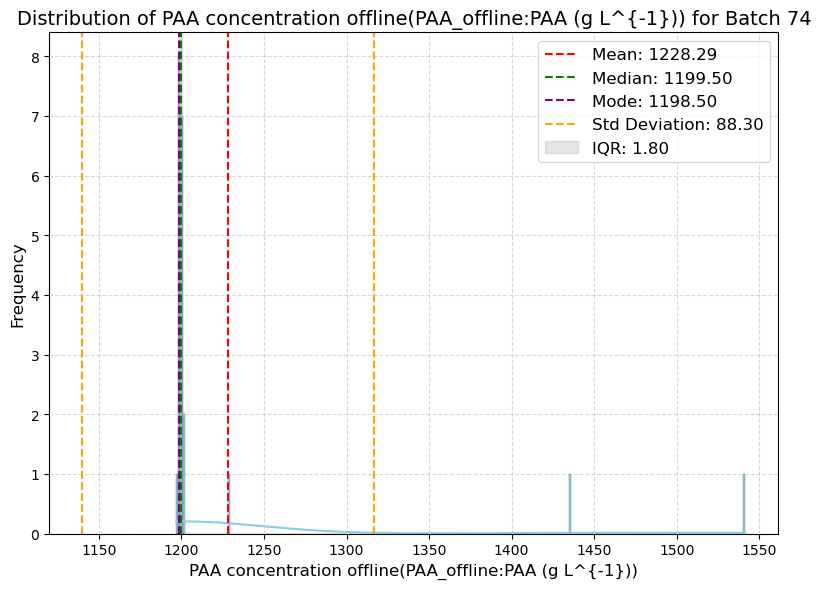

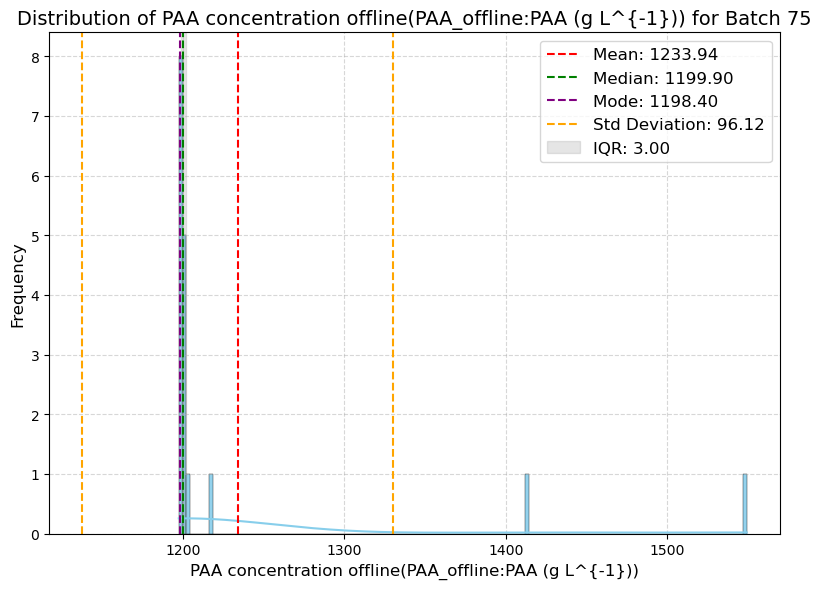

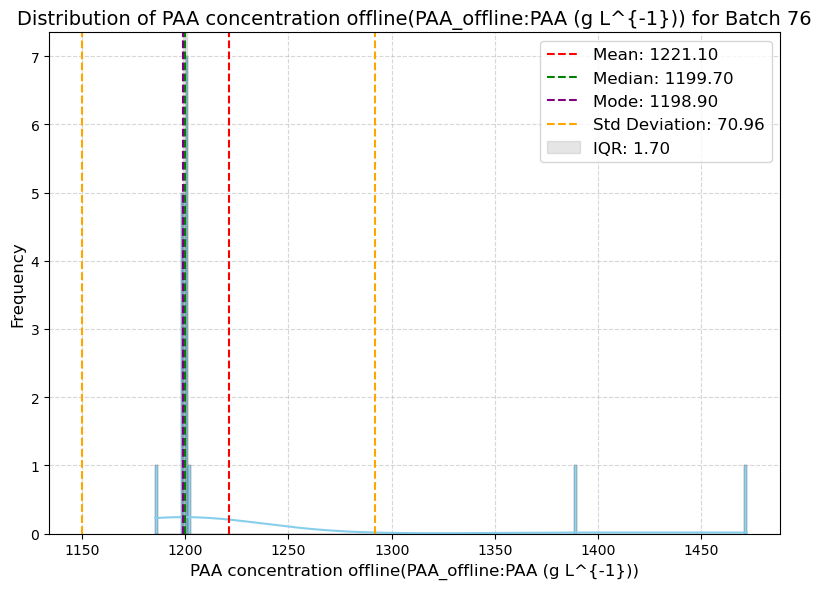

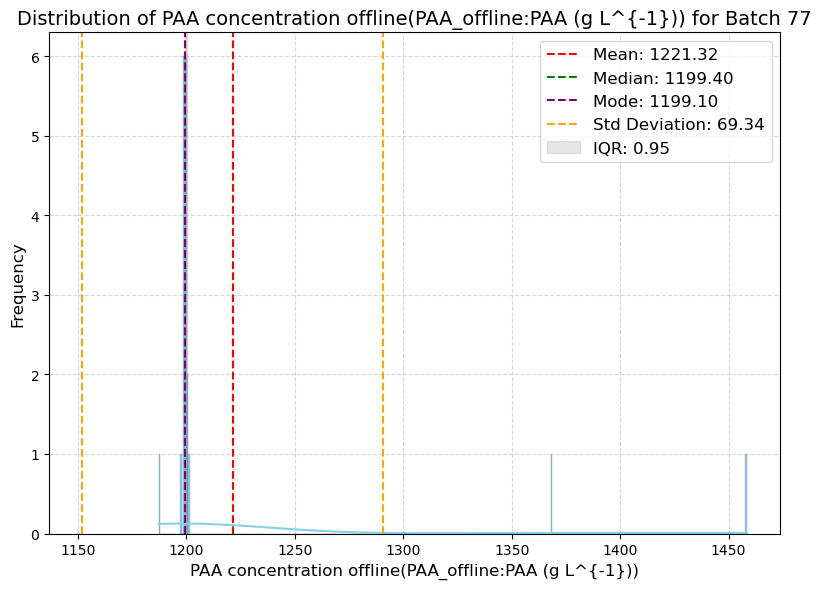

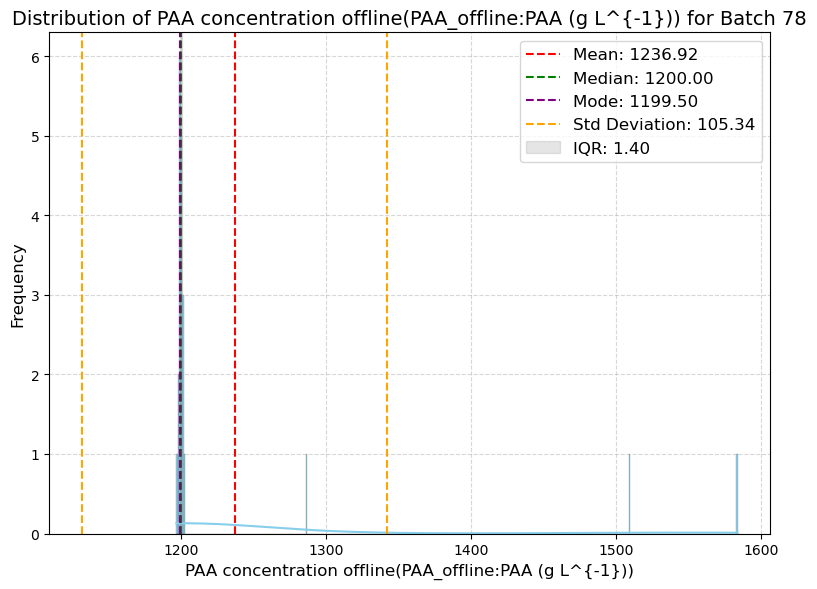

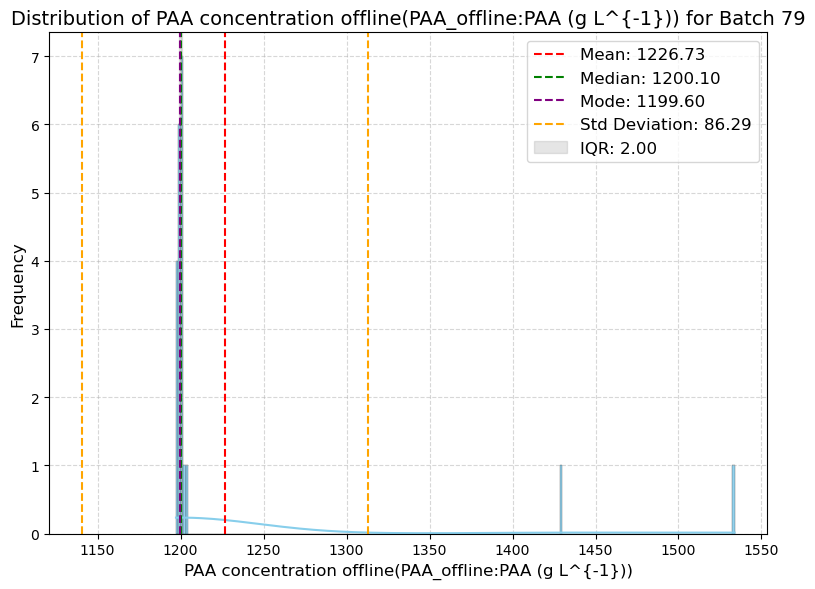

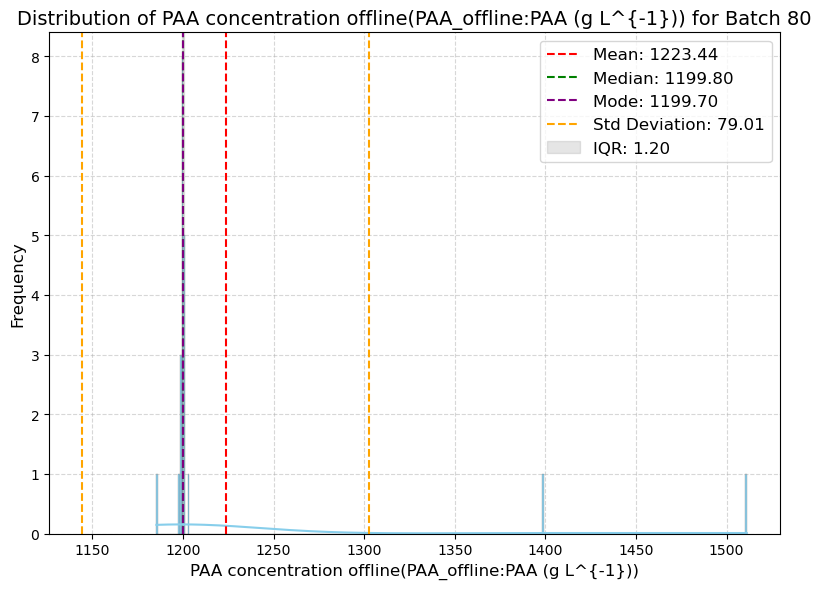

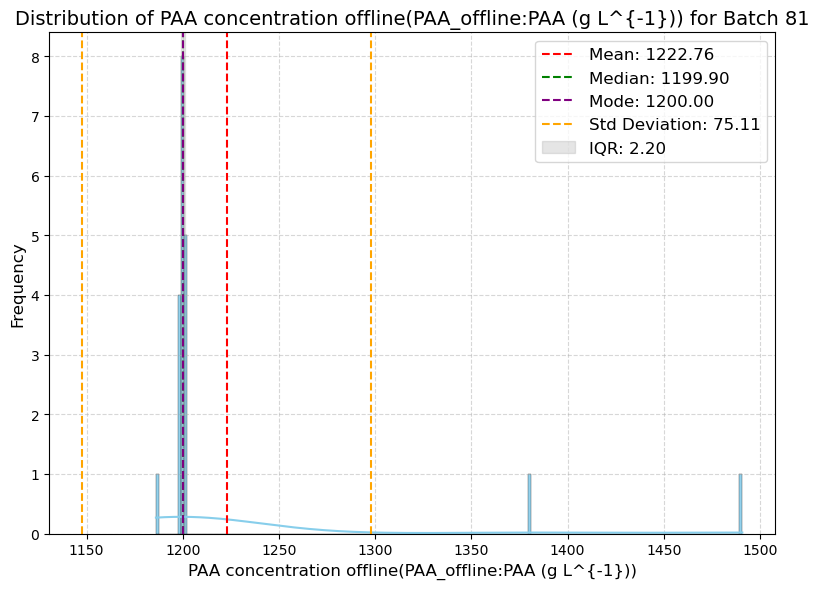

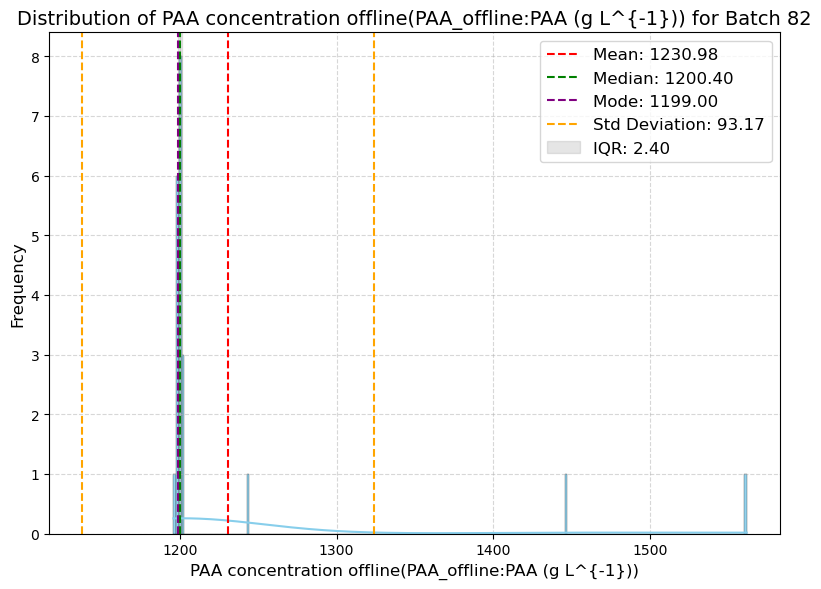

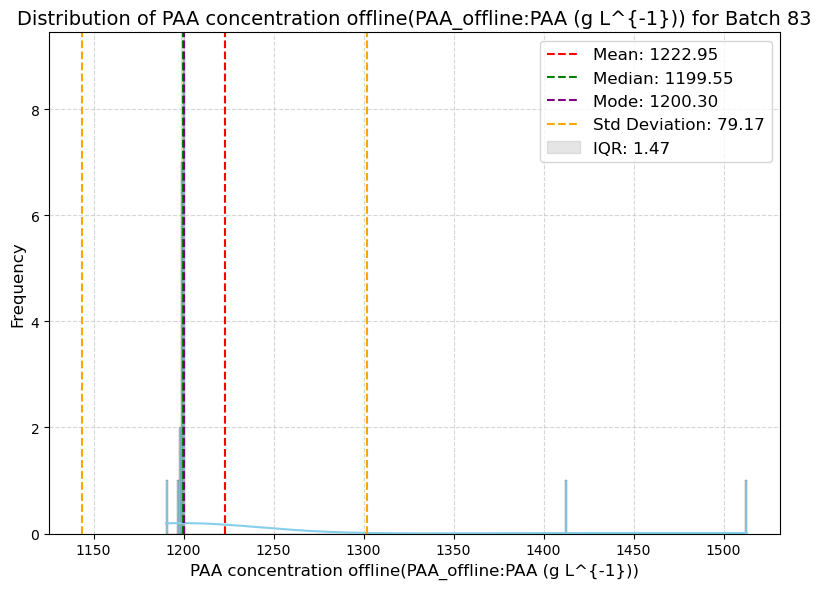

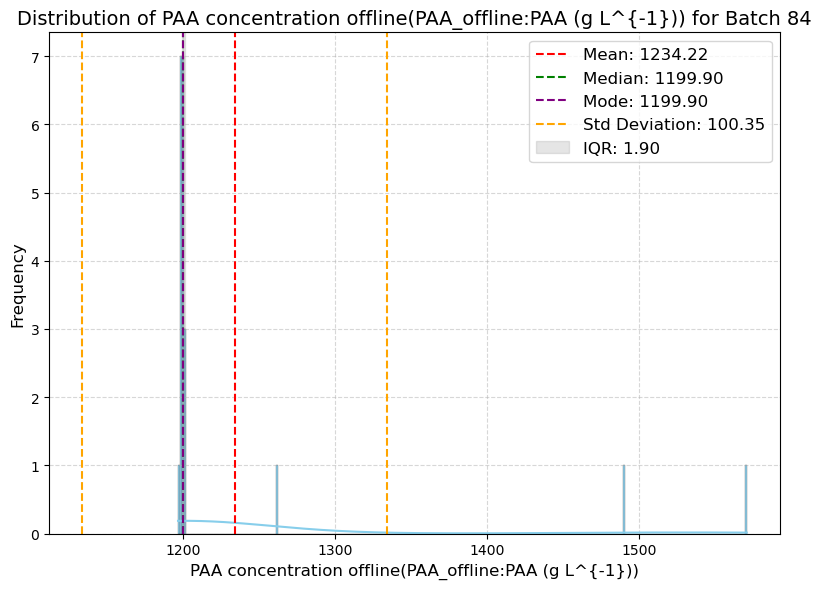

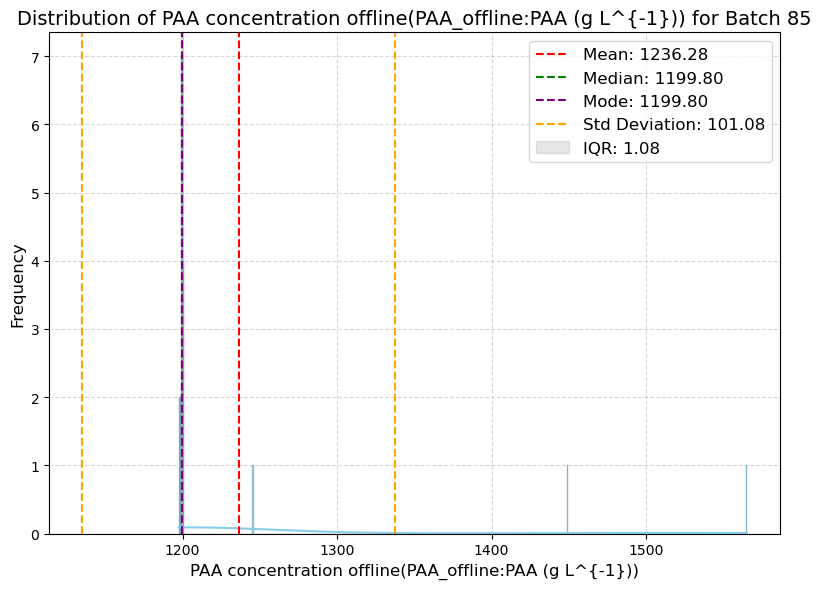

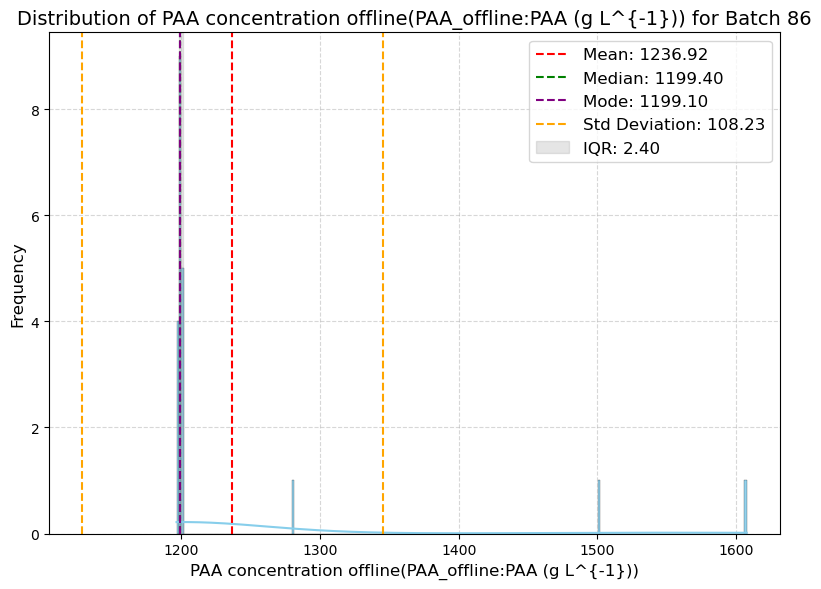

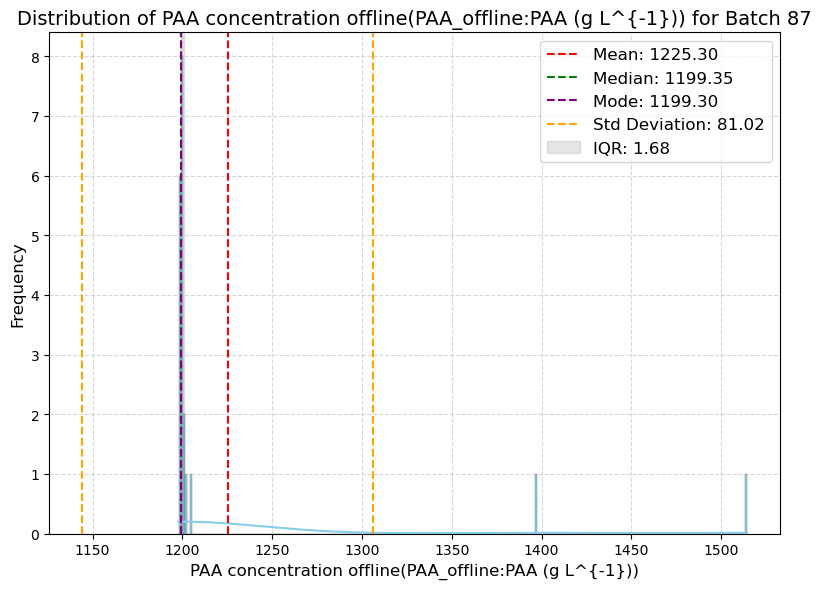

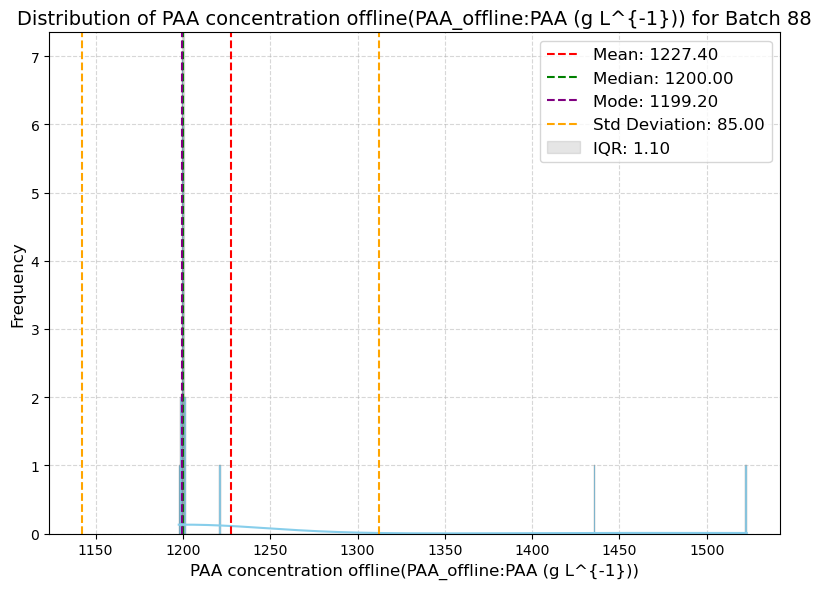

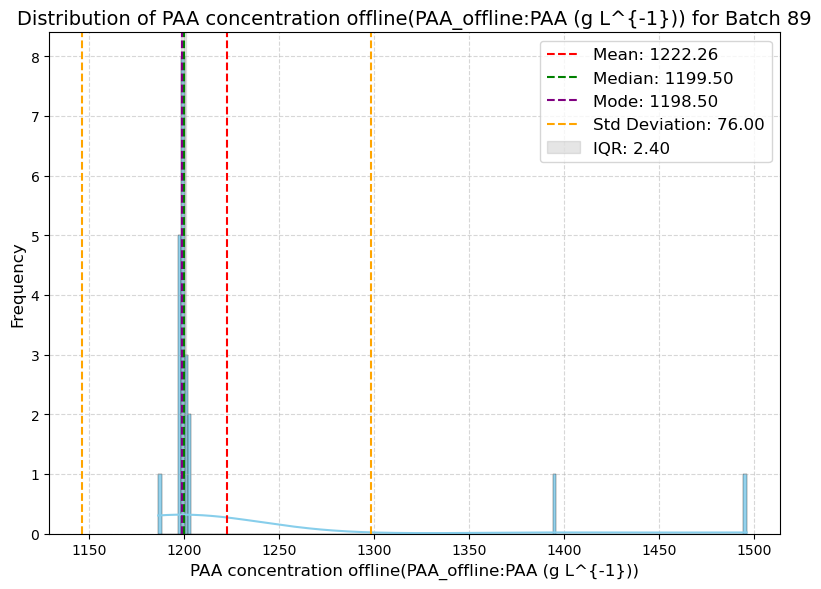

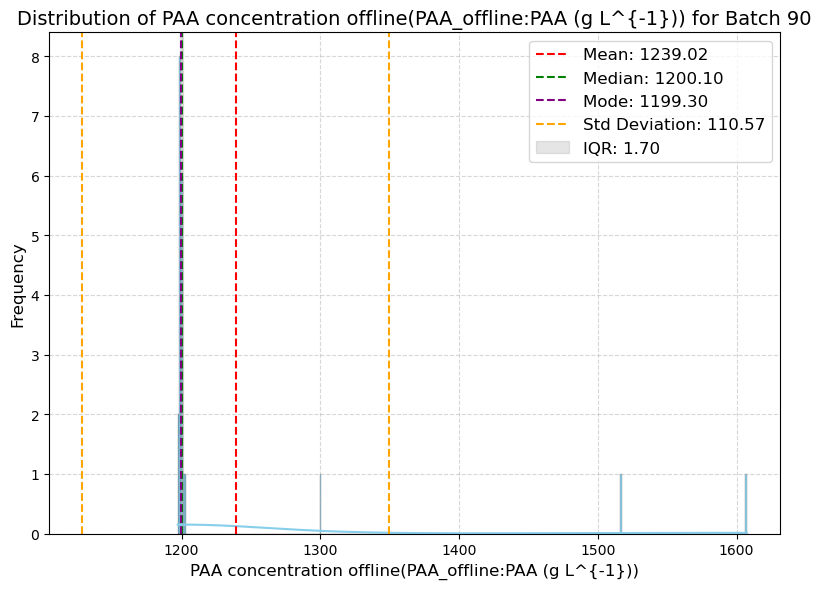

In [4]:
# Plot histogram for each batch
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=par, kde=True, color='skyblue', alpha=0.9)
    plt.title(f'Distribution of {par} for Batch {i}', fontsize=14)
    plt.xlabel(par, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Annotate mean, median, and mode values on the histogram
    plt.axvline(df[par].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {df[par].mean():.2f}')
    plt.axvline(df[par].median(), color='green', linestyle='--', linewidth=1.5, label=f'Median: {df[par].median():.2f}')
    mode_value = df[par].mode().iloc[0] if not df[par].mode().empty else None
    if mode_value:
        plt.axvline(mode_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mode: {mode_value:.2f}')

    # Add one standard deviation below and above the mean
    std_dev = df[par].std()
    plt.axvline(df[par].mean() - std_dev, color='orange', linestyle='--', linewidth=1.5, label=f'Std Deviation: {std_dev:.2f}')
    plt.axvline(df[par].mean() + std_dev, color='orange', linestyle='--', linewidth=1.5)

    # Calculate interquartile range (IQR) and add shaded region
    Q1 = df[par].quantile(0.25)
    Q3 = df[par].quantile(0.75)
    IQR = Q3 - Q1
    plt.axvspan(Q1, Q3, color='gray', alpha=0.2, label=f'IQR: {IQR:.2f}')

    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


## Combined Statistical Analysis and Distribution Plotting: Aggregated Batch Data
### Batches 61-90: Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy

In [5]:
import os
import pandas as pd

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Initialize an empty list to store the parameter values from all batches
combined_parameter_values = []

# Iterate over batch numbers
for i in range(61, 91):
    # Construct the file path for the current batch
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)
    # Extract the values of the parameter of interest
    parameter_values = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].tolist()
    # Extend the list with the parameter values from the current batch
    combined_parameter_values.extend(parameter_values)

# Create a DataFrame with the combined parameter values
combined_df = pd.DataFrame({par: combined_parameter_values})

# Calculate MEAN, MEDIAN, STD, MIN, MAX values of the combined parameter values
mean_combined = combined_df[par].mean()
median_combined = combined_df[par].median()
std_combined = combined_df[par].std()
min_combined = combined_df[par].min()
max_combined = combined_df[par].max()
mode_combined = combined_df[par].mode()
mode_combined_value = mode_combined.iloc[0] if not mode_combined.empty else None
Q1_combined = combined_df[par].quantile(0.25)
Q3_combined = combined_df[par].quantile(0.75)
IQR_combined = Q3_combined - Q1_combined

# Create a DataFrame with the statistical values of the combined parameter values
stats_combined = pd.DataFrame({
    'Statistic (Agg Batched)': ['Mean', 'Median', 'Mode', 'Std', 'Min', 'Max', 'Q1', 'Q3', 'IQR'],
    'Value (Agg Batched)': [mean_combined, median_combined, mode_combined_value, std_combined, min_combined, max_combined, Q1_combined, Q3_combined, IQR_combined]
})

# Display the summary DataFrame
# stats_combined: statistic values for the analyzing parameter for all the batches (1 to 30).
# combined_df: values of the analyzing parameter for all the batches in one column.
# print(stats_combined)
# # print(combined_df)
stats_combined

,Statistic (Agg Batched),Value (Agg Batched)
0,Mean,1227.361601
1,Median,1199.700000
2,Mode,1199.300000
3,Std,84.636195
4,Min,1185.100000
5,Max,1607.700000
6,Q1,1198.975000
7,Q3,1200.900000
8,IQR,1.925000


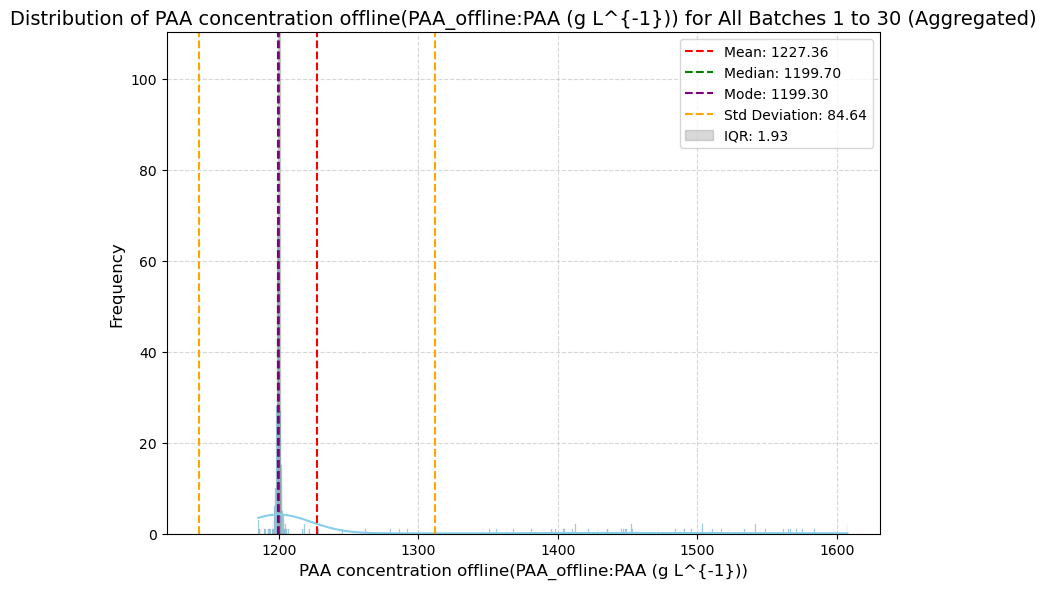

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate interquartile range (IQR)
Q1 = combined_df[par].quantile(0.25)
Q3 = combined_df[par].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x=par, kde=True, color='skyblue', alpha=0.7)
plt.title(f'Distribution of {par} for All Batches 61 to 90 (Aggregated)', fontsize=14)
plt.xlabel(par, fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate mean, median, and mode values on the histogram
plt.axvline(mean_combined, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_combined:.2f}')
plt.axvline(median_combined, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_combined:.2f}')
plt.axvline(mode_combined_value, color='purple', linestyle='--', linewidth=1.5, label=f'Mode: {mode_combined_value:.2f}')
# Add one standard deviation below and above the mean
plt.axvline(mean_combined - std_combined, color='orange', linestyle='--', linewidth=1.5, label=f'Std Deviation: {std_combined:.2f}')
plt.axvline(mean_combined + std_combined, color='orange', linestyle='--', linewidth=1.5)
# Calculate interquartile range (IQR) and add shaded region
plt.axvspan(Q1, Q3, color='gray', alpha=0.3, label=f'IQR: {IQR:.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## Static Plotting for Variabilities between Batches (Comparisons)

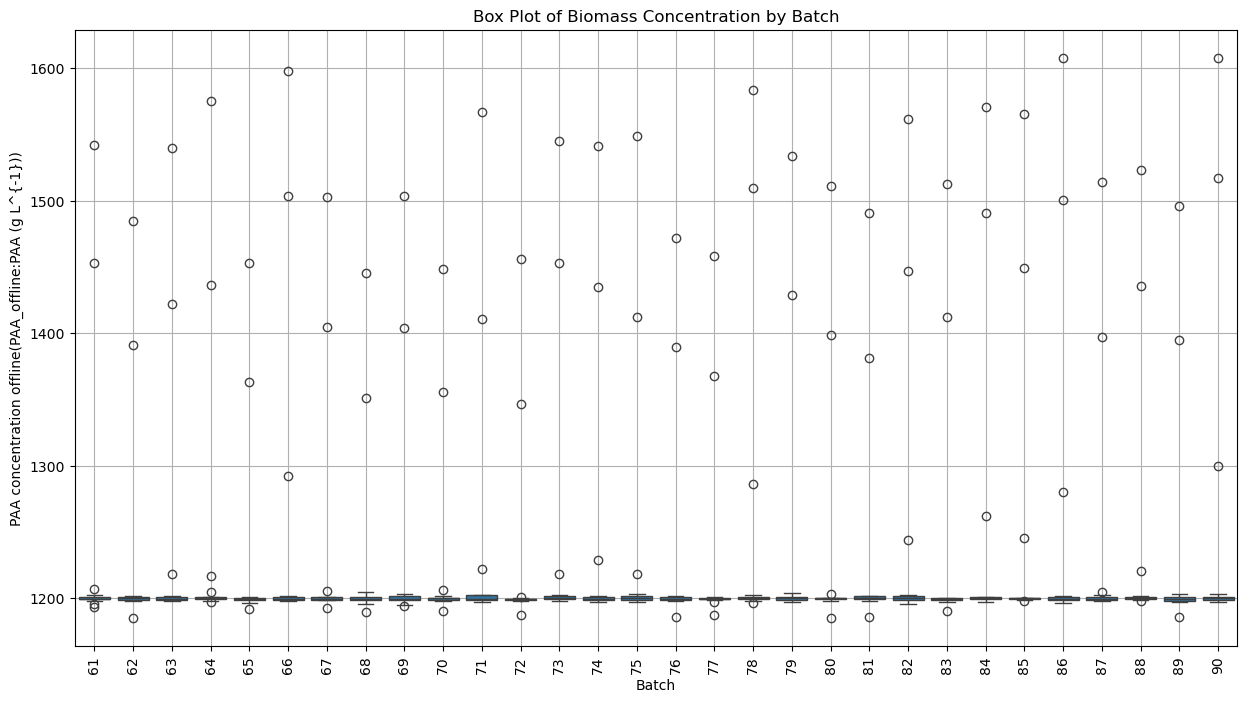

In [7]:
# Combine all batch data for box plot visualization
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch'] = i
    df.dropna(subset=['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'], inplace=True)
    all_batches.append(df)

all_combined_df = pd.concat(all_batches, ignore_index=True)
# all_combined_df: all the batches in one table!
# Plot box plots for each batch
plt.figure(figsize=(15, 8))
sns.boxplot(x='Batch', y=par, data=all_combined_df)
plt.title('Box Plot of PAA Concentration by Batch')
plt.xlabel('Batch')
plt.ylabel(par)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


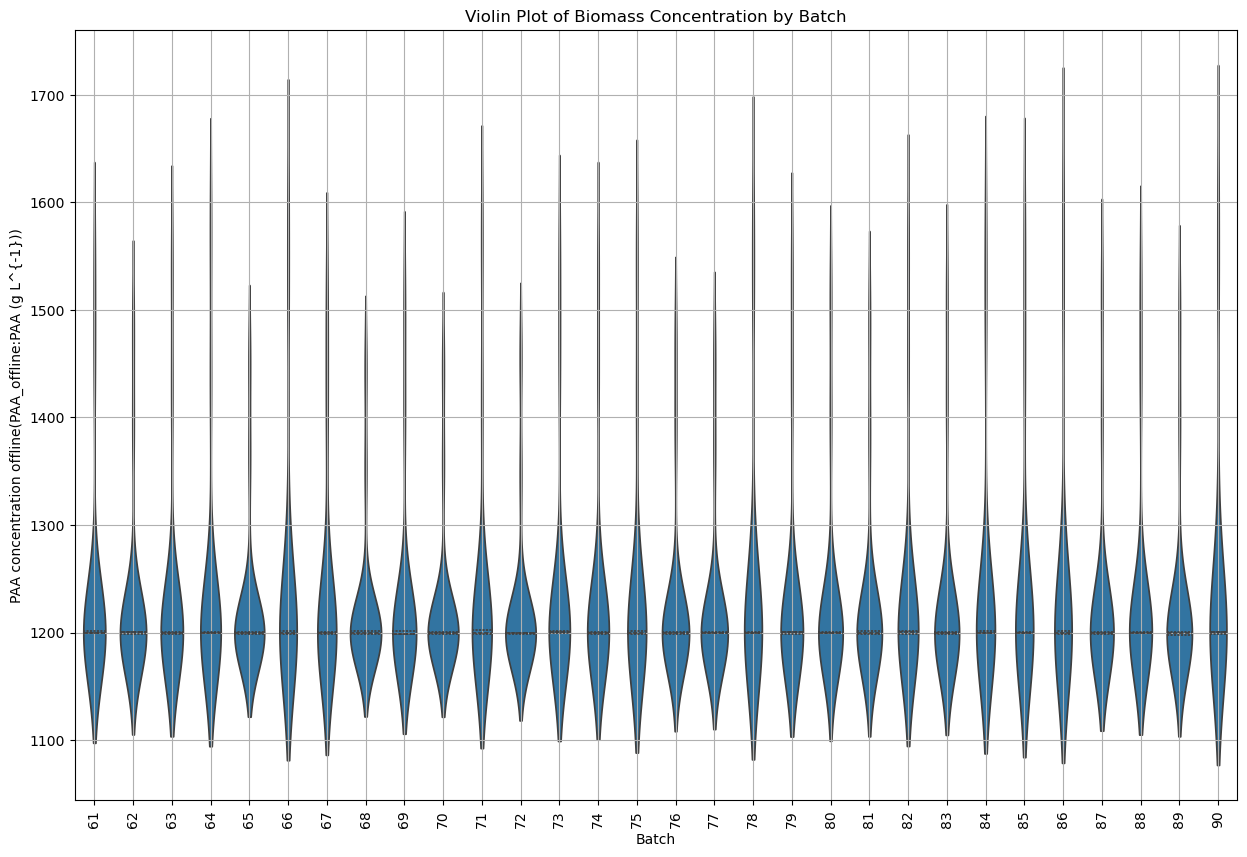

In [8]:
# Plot violin plots for each batch
plt.figure(figsize=(15, 10))
sns.violinplot(x='Batch', y=par, data=all_combined_df, inner='quartile')
plt.title('Violin Plot of PAA Concentration by Batch')
plt.xlabel('Batch')
plt.ylabel(par)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Criterion Setup for all the batches

### **Criteria Selection Summary**

For the evaluation of Phenyl Acetic Acid (PAA) Concentration, a control strategy based on literature guidelines has been employed:

Control Strategy: Maintain PAA Concentration between 600 and 1800 mg/L.

### **Criteria for Evaluation**

The PAA Concentration values were categorized into two performance levels based on the established control strategy:

- **Optimal:** Values between 600 and 1800 mg/L.
- **Non-optimal:** Values below 600 mg/L or above 1800 mg/L.

***Rationale for Criteria***

The choice of these criteria is based on the need to objectively categorize batch performance using established control guidelines:

Control Strategy-Based Categorization: Using control strategy guidelines from literature provides a robust framework for classifying PAA concentrations. This ensures that the evaluation is grounded in scientifically validated standards and operational targets.
- Focus on Optimal Performance Range: The criteria emphasize maintaining PAA concentration within the optimal range (600-1800 mg/L). This range is crucial for achieving desired process outcomes and ensuring efficient production.
- Clear and Simple Classification: By defining two clear categories, Optimal and Non-optimal, the criteria facilitate straightforward evaluation and decision-making. This helps in quickly identifying batches that meet the desired standards and those that require corrective actions.
Summary of Control Strategy

- Optimal Range: 600 to 1800 mg/L, where the PAA concentration is maintained within the desired operational limits.
Non-optimal Range: Below 600 mg/L or above 1800 mg/L, where the PAA concentration falls outside the acceptable limits.
By implementing these criteria, we can systematically evaluate and compare the performance of different batches in terms of PAA concentration, leading to data-driven decisions for process optimization. This approach ensures adherence to established control strategies, promoting consistency and efficiency in production.


In [12]:
import pandas as pd
import numpy as np
import os

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Initialize a list to store parameter values for all batches
combined_parameter_values = []

# Read all batches and collect the parameter values
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values in the specified column
    df.dropna(subset=[par], inplace=True)
    
    combined_parameter_values.extend(df[par].tolist())
    df['Batch ID'] = i
    all_batches.append(df)

# Combine all batches into a single DataFrame
combined_df = pd.concat(all_batches, ignore_index=True)

# Define the criteria based on control strategy
def categorize_value(value):
    if 600 <= value <= 1800:
        return 'Optimal'
    else:
        return 'Non-optimal'

# Apply criteria to the combined data
combined_df['Criteria'] = combined_df[par].apply(categorize_value)

# Display the first few rows of the dataframe to check the results
combined_df


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,209,208,207,206,205,204,203,202,201,Criteria
0,1.0,30,100,8,0.0,0.000,102.2500,9.1418,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Optimal
1,12.0,42,100,15,0.0,94.098,159.7000,0.0001,0,0.6,...,496360.0,502870.0,508060.0,511400.0,512720.0,512270.0,510220.0,NaN,NaN,Optimal
2,24.0,55,100,150,0.0,225.000,404.1100,0.0001,0,0.7,...,505190.0,511470.0,516250.0,519260.0,520270.0,519620.0,518060.0,NaN,NaN,Optimal
3,36.0,55,100,43,0.0,112.390,129.0000,0.0001,0,0.9,...,595070.0,601380.0,606280.0,609410.0,610450.0,609700.0,608260.0,NaN,NaN,Optimal
4,48.0,60,100,57,0.0,225.000,32.9310,118.2600,0,1.1,...,777510.0,784330.0,789740.0,793280.0,794840.0,794450.0,793160.0,NaN,NaN,Optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,192.0,75,100,80,0.0,45.707,6.5522,74.3390,150,0.9,...,2368600.0,2376500.0,2383000.0,2387700.0,2390500.0,2391800.0,2392200.0,NaN,NaN,Optimal
608,204.0,65,100,80,0.0,39.495,54.3150,8.5903,250,0.9,...,2464300.0,2472500.0,2479300.0,2484200.0,2487300.0,2488400.0,2488400.0,NaN,NaN,Optimal
609,216.0,65,100,80,0.0,24.702,96.1730,12.2910,250,0.9,...,2534300.0,2542200.0,2548800.0,2553500.0,2556300.0,2557400.0,2557600.0,NaN,NaN,Optimal
610,228.0,65,100,80,0.0,37.441,11.8090,95.7020,250,0.9,...,2561700.0,2569800.0,2576500.0,2581400.0,2584400.0,2585800.0,2586300.0,NaN,NaN,Optimal


In [14]:
batch_performance

,Optimal,Batch
0,100.0,61
1,100.0,62
2,100.0,63
3,100.0,64
4,100.0,65
5,100.0,66
6,100.0,67
7,100.0,68
8,100.0,69
9,100.0,70


# Criteria Weight Distribution for Batch Evaluation
## Non-Interactive Batch Evaluation Summary

In [15]:
# Evaluate each batch and store the summary
batch_summaries = []

for i in range(61, 91):
    batch_df = combined_df[combined_df['Batch ID'] == i]
    
    # Calculate the proportion of each category
    category_counts = batch_df['Criteria'].value_counts(normalize=True) * 100
    summary = category_counts.to_dict()
    summary['Batch'] = i  # Add batch identifier
    
    batch_summaries.append(summary)

# Convert batch summaries to DataFrame
batch_performance = pd.DataFrame(batch_summaries).fillna(0)
batch_performance = batch_performance[['Batch', 'Optimal']]

# Display the summary DataFrame
print("\nBatch Performance Summary:")
print(batch_performance)



Batch Performance Summary:
    Batch  Optimal
0      61    100.0
1      62    100.0
2      63    100.0
3      64    100.0
4      65    100.0
5      66    100.0
6      67    100.0
7      68    100.0
8      69    100.0
9      70    100.0
10     71    100.0
11     72    100.0
12     73    100.0
13     74    100.0
14     75    100.0
15     76    100.0
16     77    100.0
17     78    100.0
18     79    100.0
19     80    100.0
20     81    100.0
21     82    100.0
22     83    100.0
23     84    100.0
24     85    100.0
25     86    100.0
26     87    100.0
27     88    100.0
28     89    100.0
29     90    100.0


# Interactive Batch Evaluation Summary

In [16]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Initialize a list to store parameter values for all batches
combined_parameter_values = []

# Read all batches and collect the parameter values
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values in the specified column
    df.dropna(subset=[par], inplace=True)
    
    combined_parameter_values.extend(df[par].tolist())
    df['Batch ID'] = i
    all_batches.append(df)

# Combine all batches into a single DataFrame
combined_df = pd.concat(all_batches, ignore_index=True)

# Evaluate each batch and store the summary
batch_summaries = {}

for i in range(61, 91):
    batch_df = combined_df[combined_df['Batch ID'] == i].copy()
    
    # Apply the criteria to the batch data
    batch_df.loc[:, 'Criteria'] = batch_df[par].apply(categorize_value)
    
    # Calculate the proportion of each category
    category_counts = batch_df['Criteria'].value_counts(normalize=True) * 100
    summary = category_counts.to_dict()
    
    batch_summaries[i] = summary

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Evaluation Summaries", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.H2("Evaluation Summary", style={'textAlign': 'center'}),
    html.Table(id='summary-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks')]
)
def show_all_batches(n_clicks):
    if n_clicks > 0:
        return [i for i in range(61, 91)]
    return []

@app.callback(
    Output('summary-table', 'children'),
    [Input('batch-selector', 'value')]
)
def update_summary_table(selected_batches):
    headers = [html.Tr([html.Th("Batch", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                       [html.Th(category, style={'border': '1px solid #ffffff', 'padding': '8px'}) for category in ['Optimal', 'Non-optimal']])]
    
    rows = []
    for batch_id in selected_batches:
        summary = batch_summaries.get(batch_id, {})
        row = [html.Td(batch_id, style={'border': '1px solid #ffffff', 'padding': '8px'})]
        for category in ['Optimal', 'Non-optimal']:
            row.append(html.Td(f"{summary.get(category, 0):.2f}%", style={'border': '1px solid #ffffff', 'padding': '8px'}))
        rows.append(html.Tr(row))
    
    return headers + rows

if __name__ == '__main__':
    app.run_server(debug=True)


# **Allocating Final Score to The Each Batch**

In [18]:
# Calculate scores for each batch based on the proportion of 'Optimal' values
batch_performance['Score'] = batch_performance['Optimal']

# Rank batches based on scores
batch_performance['Rank'] = batch_performance['Score'].rank(ascending=False, method='dense').astype(int)

# Sort by rank
batch_performance = batch_performance.sort_values(by='Rank')

# Display the summary DataFrame with ranks
print("\nBatch Performance Summary with Ranks:")
print(batch_performance[['Batch', 'Optimal', 'Score', 'Rank']])



Batch Performance Summary with Ranks:
    Batch  Optimal  Score  Rank
0      61    100.0  100.0     1
1      62    100.0  100.0     1
2      63    100.0  100.0     1
3      64    100.0  100.0     1
4      65    100.0  100.0     1
5      66    100.0  100.0     1
6      67    100.0  100.0     1
7      68    100.0  100.0     1
8      69    100.0  100.0     1
9      70    100.0  100.0     1
10     71    100.0  100.0     1
11     72    100.0  100.0     1
12     73    100.0  100.0     1
13     74    100.0  100.0     1
14     75    100.0  100.0     1
15     76    100.0  100.0     1
16     77    100.0  100.0     1
17     78    100.0  100.0     1
18     79    100.0  100.0     1
19     80    100.0  100.0     1
20     81    100.0  100.0     1
21     82    100.0  100.0     1
22     83    100.0  100.0     1
23     84    100.0  100.0     1
24     85    100.0  100.0     1
25     86    100.0  100.0     1
26     87    100.0  100.0     1
27     88    100.0  100.0     1
28     89    100.0  100.0     1
2

In [19]:
batch_performance

,Batch,Optimal,Score,Rank
0,61,100.0,100.0,1
1,62,100.0,100.0,1
2,63,100.0,100.0,1
3,64,100.0,100.0,1
4,65,100.0,100.0,1
5,66,100.0,100.0,1
6,67,100.0,100.0,1
7,68,100.0,100.0,1
8,69,100.0,100.0,1
9,70,100.0,100.0,1


### Interactive Batch Performance Ranking

In [20]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output, State, callback_context


# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Performance Ranking", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Button('Show All Batches', id='show-all-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.Button('Show Top N Batches', id='show-top-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Input(id='top-n-input', type='number', value=5, min=1, max=30, step=1, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    html.Button('Show Bottom N Batches', id='show-bottom-button', n_clicks=0, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Input(id='bottom-n-input', type='number', value=5, min=1, max=30, step=1, style={'margin': '10px', 'display': 'block', 'marginLeft': 'auto', 'marginRight': 'auto'}),
    dcc.Dropdown(
        id='sort-selector',
        options=[
            {'label': 'Rank', 'value': 'Rank'},
            {'label': 'Score', 'value': 'Score'},
            {'label': 'Batch', 'value': 'Batch'}
        ],
        value='Rank',
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.H2("Ranking Summary", style={'textAlign': 'center'}),
    html.Table(id='ranking-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('batch-selector', 'value'),
    [Input('show-all-button', 'n_clicks'),
     Input('show-top-button', 'n_clicks'),
     Input('show-bottom-button', 'n_clicks')],
    [State('top-n-input', 'value'),
     State('bottom-n-input', 'value')]
)
def update_batch_selection(show_all_clicks, show_top_clicks, show_bottom_clicks, top_n, bottom_n):
    ctx = callback_context
    if not ctx.triggered:
        return []
    
    button_id = ctx.triggered[0]['prop_id'].split('.')[0]
    
    if button_id == 'show-all-button':
        return [i for i in range(61, 91)]
    elif button_id == 'show-top-button':
        top_batches = batch_performance.nsmallest(top_n, 'Rank')['Batch'].tolist()
        return top_batches
    elif button_id == 'show-bottom-button':
        bottom_batches = batch_performance.nlargest(bottom_n, 'Rank')['Batch'].tolist()
        return bottom_batches
    return []

@app.callback(
    Output('ranking-table', 'children'),
    [Input('batch-selector', 'value'),
     Input('sort-selector', 'value')]
)
def update_ranking_table(selected_batches, sort_by):
    if not selected_batches:
        return []
    
    # Sort the summary DataFrame based on the selected sort option
    sorted_df = batch_performance[batch_performance['Batch'].isin(selected_batches)].sort_values(by=sort_by)
    
    headers = [html.Tr([html.Th("Batch", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                       [html.Th(column, style={'border': '1px solid #ffffff', 'padding': '8px'}) for column in sorted_df.columns[1:]])]
    
    rows = []
    for _, row_data in sorted_df.iterrows():
        row = [html.Td(row_data['Batch'], style={'border': '1px solid #ffffff', 'padding': '8px'})]
        row.extend([html.Td(f"{row_data[col]:.2f}" if isinstance(row_data[col], float) else row_data[col], style={'border': '1px solid #ffffff', 'padding': '8px'}) for col in sorted_df.columns[1:]])
        rows.append(html.Tr(row))
    
    return headers + rows

if __name__ == '__main__':
    app.run_server(debug=True)


# Interactive Visualization for Comparative Analysis (Best and Worst as Starting Plots)

In [22]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
from scipy.stats import gaussian_kde

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    return pd.read_csv(file_path)

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Density Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch, ],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot', style={'height': '60vh'}),
    html.H2("Batch Variability Comparison", style={'textAlign': 'center'}),
    html.Table(id='comparison-table', style={'width': '80%', 'margin': 'auto', 'borderCollapse': 'collapse', 'backgroundColor': '#2e2e2e', 'color': '#ffffff'})
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    fig = go.Figure()
    
    for batch in selected_batches:
        df = load_batch_data(batch)
        penicillin_data = df[par].dropna()  # Remove NaN values

        if penicillin_data.empty:
            continue

        # Calculate KDE
        kde = gaussian_kde(penicillin_data)
        x_values = np.linspace(penicillin_data.min(), penicillin_data.max(), 1000)
        kde_values = kde(x_values)
        
        fig.add_trace(go.Histogram(x=penicillin_data, name=f'Batch {batch}', opacity=0.6, histnorm='probability density'))
        fig.add_trace(go.Scatter(x=x_values, y=kde_values, mode='lines', name=f'Batch {batch} (KDE)', line=dict(width=2), showlegend=False))
    
    fig.update_layout(
        barmode='overlay',
        title='Distribution of PAA Concentration',
        xaxis_title=par,
        yaxis_title='Density',
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff',
    )
    return fig

@app.callback(
    Output('comparison-table', 'children'),
    [Input('batch-selector', 'value')]
)
def update_comparison_table(selected_batches):
    headers = html.Tr([html.Th("Metric", style={'border': '1px solid #ffffff', 'padding': '8px'})] +
                      [html.Th(f'Batch {batch}', style={'border': '1px solid #ffffff', 'padding': '8px'}) for batch in selected_batches])
    
    rows = []
    metrics = ['Mean', 'Median', 'Standard Deviation', 'IQR']
    
    for metric in metrics:
        row = [html.Td(metric, style={'border': '1px solid #ffffff', 'padding': '8px'})]
        for batch in selected_batches:
            df = load_batch_data(batch)
            if metric == 'Mean':
                value = df[par].mean()
            elif metric == 'Median':
                value = df[par].median()
            elif metric == 'Standard Deviation':
                value = df[par].std()
            elif metric == 'IQR':
                value = df[par].quantile(0.75) - df[par].quantile(0.25)
            row.append(html.Td(f"{value:.2f}", style={'border': '1px solid #ffffff', 'padding': '8px'}))
        rows.append(html.Tr(row))
    
    return [headers] + rows

if __name__ == '__main__':
    app.run_server(debug=True)


In [25]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)  # Remove NaN values
    df['Batch'] = batch_number
    return df

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Density Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch,],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot', style={'height': '60vh'}),
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    if not selected_batches:
        return go.Figure()

    fig = go.Figure()

    for batch in selected_batches:
        df = load_batch_data(batch)
        penicillin_data = df[par]

        # Check if the data is not empty after dropping NaNs
        if penicillin_data.empty:
            continue

        hist_trace_name = f'Batch {batch}'

        fig.add_trace(go.Histogram(
            x=penicillin_data,
            histnorm='density',
            name=hist_trace_name,
            opacity=0.6
        ))

        median = penicillin_data.median()
        mode = penicillin_data.mode().iloc[0] if not penicillin_data.mode().empty else np.nan
        iqr = penicillin_data.quantile(0.75) - penicillin_data.quantile(0.25)

        fig.add_trace(go.Scatter(
            x=[median],
            y=[0],
            mode='markers+text',
            text=[f'Median: {median:.2f}<br>Mode: {mode:.2f}<br>IQR: {iqr:.2f}'],
            textposition='top center',
            marker=dict(color='red', size=10, symbol='diamond'),
            hoverinfo='text',
            showlegend=False  # Hide legend for scatter trace
        ))

    fig.update_layout(
        title='Density Plot of PAA Concentration',
        xaxis_title='PAA concentration(P:g/L)',
        yaxis_title='Density',
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff',
        barmode='overlay'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [27]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)  # Remove NaN values
    df['Batch'] = batch_number
    return df

# Function to calculate metrics for hover info
def calculate_metrics(df):
    metrics = {}
    metrics['Median'] = df[par].median()
    metrics['Mode'] = df[par].mode().iloc[0] if not df[par].mode().empty else np.nan
    metrics['Min'] = df[par].min()
    metrics['Max'] = df[par].max()
    metrics['IQR'] = df[par].quantile(0.75) - df[par].quantile(0.25)
    return metrics

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Box Plot Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch,],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='box-plot', style={'height': '60vh'})
])

@app.callback(
    Output('box-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_box_plot(selected_batches):
    combined_df = pd.concat([load_batch_data(batch) for batch in selected_batches], ignore_index=True)
    
    fig = go.Figure()
    
    for batch in selected_batches:
        df = combined_df[combined_df['Batch'] == batch]
        metrics = calculate_metrics(df)
        
        fig.add_trace(go.Box(
            y=df[par],
            name=f'Batch {batch}',
            boxpoints='all',
            jitter=0.3,
            pointpos=-1.8,
            hovertext=[
                f"Median: {metrics['Median']:.2f}<br>"
                f"Mode: {metrics['Mode']:.2f}<br>"
                f"Min: {metrics['Min']:.2f}<br>"
                f"Max: {metrics['Max']:.2f}<br>"
                f"IQR: {metrics['IQR']:.2f}"
                for _ in range(len(df))
            ]
        ))
    
    fig.update_layout(
        title='Box Plot of PAA Concentration',
        xaxis_title='Batch',
        yaxis_title=par,
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff',
        showlegend=False
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [28]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Function to load data for a given batch
def load_batch_data(batch_number):
    file_path = os.path.join(folder_path, f'Batch_{batch_number}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=[par], inplace=True)  # Remove NaN values
    df['Batch'] = batch_number
    return df

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#1e1e1e', 'color': '#ffffff', 'font-family': 'Arial, sans-serif'}, children=[
    html.H1("Batch Distribution Comparison", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[best_batch],
        multi=True,
        clearable=True,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='violin-plot', style={'height': '60vh'}),
])

@app.callback(
    Output('violin-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_violin_plot(selected_batches):
    if not selected_batches:
        return go.Figure()

    combined_df = pd.concat([load_batch_data(batch) for batch in selected_batches], ignore_index=True)
    
    fig = go.Figure()

    for batch in selected_batches:
        batch_data = combined_df[combined_df['Batch'] == batch]
        
        fig.add_trace(go.Violin(
            x=batch_data['Batch'], 
            y=batch_data[par],
            name=f'Batch {batch}',
            box_visible=True,
            meanline_visible=True
        ))
        
        median = batch_data[par].median()
        mode = batch_data[par].mode().iloc[0] if not batch_data[par].mode().empty else np.nan
        iqr = batch_data[par].quantile(0.75) - batch_data[par].quantile(0.25)

        fig.add_trace(go.Scatter(
            x=[batch], 
            y=[median],
            mode='markers+text',
            text=[f'Median: {median:.2f}<br>Mode: {mode:.2f}<br>IQR: {iqr:.2f}'],
            textposition='top center',
            marker=dict(color='red', size=10, symbol='diamond'),
            hoverinfo='text',
            showlegend=False  # Remove scatter traces from legend
        ))

    fig.update_layout(
        title='Violin Plot of PAA Concentration',
        xaxis_title='Batch',
        yaxis_title=par,
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#1e1e1e',
        font_color='#ffffff'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


# Precision1: Evaluating Interquartile Range (IQR) Relative to Optimal Range

### Understanding Performance and Precision
- **Performance:** In this context, performance refers to how well each batch meets the optimal criteria for PAA concentration. We have already quantified this using a percentage-based scoring system, where the score represents the proportion (Time) of values within the optimal range. This metric is useful for comparing batches and identifying those that consistently meet the required standards.

- **Precision:** Precision, in this context, would refer to the consistency of PAA concentration values within each batch. Even if a batch has a high performance score (i.e., a high percentage of values within the optimal range), it is also important to know how consistently the values are hitting close to a central point within the optimal range.

### Quartile-Based Precision Metric Relative to the Optimal Range

To evaluate the precision of each batch in relation to the optimal PAA concentration range (600 to 1800 mg/L), we use a quartile-based precision metric. This metric is robust to various distributions and focuses on the spread of data points around the optimal range.

#### Steps to Calculate the Precision Metric

1. **Calculate Quartiles**:
   - First quartile (Q1): 25th percentile of the data.
   - Third quartile (Q3): 75th percentile of the data.

2. **Determine the Overlap of the Interquartile Range (IQR) with the Optimal Range**:
   - The IQR is defined as \( IQR = Q3 - Q1 \).
   - The optimal range is defined as 600 to 1800 mg/L.

3. **Calculate the Overlap**:
   - Lower bound of IQR within the optimal range: \( Max(Q1, 600) \).
   - Upper bound of IQR within the optimal range: \( Min(Q3, 1800) \).
   - Length of IQR within the optimal range: \( Min(Q3, 1800) - max(Q1, 600) \).

4. **Calculate the Proportion of IQR within the Optimal Range**:
   \[
   \text{Proportion of IQR within Optimal Range} = \frac{\min(Q3, 1800) - \max(Q1, 600)}{Q3 - Q1}
   \]

5. **Convert to Percentage**:
   \[
   \text{Precision Metric} = \left( \frac{\min(Q3, 1800) - \max(Q1, 600)}{Q3 - Q1} \right) \times 100
   \]

#### Example Calculation

For a batch with PAA values:

- **PAA values**: [500, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

1. Calculate Quartiles:
   - \( Q1 \): 750 mg/L
   - \( Q3 \): 1500 mg/L

2. Optimal Range: 600 to 1800 mg/L

3. Overlap Calculation:
   - Lower bound of IQR within the optimal range: \( \max(750, 600) = 750 \)
   - Upper bound of IQR within the optimal range: \( \min(1500, 1800) = 1500 \)
   - Length of IQR within the optimal range: \( 1500 - 750 = 750 \) mg/L
   - Length of total IQR: \( 1500 - 750 = 750 \) mg/L
   - Proportion of IQR within the optimal range: \( \frac{750}{750} = 1 \) (or 100%)

#### Summary for Batch 1

- **Performance**: 70% of values within the optimal range.
- **Precision**: 100% of the IQR is within the optimal range, indicating high precision.

This quartile-based precision metric provides a robust measure of precision that is suitable for various distributions. It focuses on the central spread of the data and its alignment with the optimal range.


In [29]:
stats_1

,Batch,Mean_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Median_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Mode_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Std_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Min_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Max_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Q1_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Q3_PAA concentration offline(PAA_offline:PAA (g L^{-1})),IQR_PAA concentration offline(PAA_offline:PAA (g L^{-1}))
0,61,1226.754545,1199.75,1199.4,88.713019,1193.1,1541.8,1199.150,1201.050,1.900
1,62,1221.838095,1200.30,1200.6,73.390779,1185.1,1484.7,1199.000,1200.600,1.600
2,63,1227.247619,1199.50,1199.3,86.546858,1197.7,1540.1,1198.800,1200.600,1.800
3,64,1229.714286,1199.80,1198.8,94.444017,1197.1,1575.4,1199.300,1200.700,1.400
4,65,1218.838095,1199.30,1199.0,64.523286,1192.0,1452.9,1198.700,1200.300,1.600
5,66,1237.409524,1199.70,1198.1,107.143403,1197.9,1597.9,1198.900,1201.100,2.200
6,67,1233.306667,1199.50,1199.5,91.441070,1192.7,1502.9,1199.000,1200.600,1.600
7,68,1217.990476,1199.60,1198.3,61.861789,1189.3,1445.7,1198.300,1201.300,3.000
8,69,1224.520000,1199.10,1199.0,80.072175,1193.9,1503.7,1198.775,1201.450,2.675
9,70,1218.647619,1199.90,1200.0,62.784836,1190.0,1448.3,1198.800,1200.200,1.400


In [30]:
import pandas as pd

# Data
data = stats_1[['Batch','Q1_PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Q3_PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'IQR_PAA concentration offline(PAA_offline:PAA (g L^{-1}))']]

# Create DataFrame
pre = pd.DataFrame(data)

# Calculate precision metric
def calculate_precision(Q1, Q3, IQR):
    optimal_min = 600
    optimal_max = 1800
    lower_bound = max(Q1, optimal_min)
    upper_bound = min(Q3, optimal_max)
    if upper_bound > lower_bound:
        proportion_within_range = (upper_bound - lower_bound) / IQR
    else:
        proportion_within_range = 0
    precision_metric = proportion_within_range * 100
    return precision_metric

pre["Precision Metric (%)"] = pre.apply(lambda row: calculate_precision(row["Q1_PAA concentration offline(PAA_offline:PAA (g L^{-1}))"], row["Q3_PAA concentration offline(PAA_offline:PAA (g L^{-1}))"], row["IQR_PAA concentration offline(PAA_offline:PAA (g L^{-1}))"]), axis=1)

pre


,Batch,Q1_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Q3_PAA concentration offline(PAA_offline:PAA (g L^{-1})),IQR_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Precision Metric (%)
0,61,1199.150,1201.050,1.900,100.0
1,62,1199.000,1200.600,1.600,100.0
2,63,1198.800,1200.600,1.800,100.0
3,64,1199.300,1200.700,1.400,100.0
4,65,1198.700,1200.300,1.600,100.0
5,66,1198.900,1201.100,2.200,100.0
6,67,1199.000,1200.600,1.600,100.0
7,68,1198.300,1201.300,3.000,100.0
8,69,1198.775,1201.450,2.675,100.0
9,70,1198.800,1200.200,1.400,100.0


In [32]:
batch_performance_with_precision = batch_performance.merge(pre, on='Batch')
# batch_performance_with_precision.to_csv('PAA_Analysis_61_90_(IQR).csv')
batch_performance_with_precision

,Batch,Optimal,Score,Rank,Q1_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Q3_PAA concentration offline(PAA_offline:PAA (g L^{-1})),IQR_PAA concentration offline(PAA_offline:PAA (g L^{-1})),Precision Metric (%)
0,61,100.0,100.0,1,1199.150,1201.050,1.900,100.0
1,62,100.0,100.0,1,1199.000,1200.600,1.600,100.0
2,63,100.0,100.0,1,1198.800,1200.600,1.800,100.0
3,64,100.0,100.0,1,1199.300,1200.700,1.400,100.0
4,65,100.0,100.0,1,1198.700,1200.300,1.600,100.0
5,66,100.0,100.0,1,1198.900,1201.100,2.200,100.0
6,67,100.0,100.0,1,1199.000,1200.600,1.600,100.0
7,68,100.0,100.0,1,1198.300,1201.300,3.000,100.0
8,69,100.0,100.0,1,1198.775,1201.450,2.675,100.0
9,70,100.0,100.0,1,1198.800,1200.200,1.400,100.0


In [34]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance.loc[batch_performance['Rank'].idxmin()]['Batch']
worst_batch = batch_performance.loc[batch_performance['Rank'].idxmax()]['Batch']

# Load all batches into a single DataFrame
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'], inplace=True)  # Remove NaN values
    df['Batch ID'] = i
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("PAA Concentration Analysis"),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(61, 91)],
        value=[best_batch],
        multi=True,
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot'),
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    fig = go.Figure()

    y_offset = 0.05  # Offset for y position of annotations

    for idx, batch in enumerate(selected_batches):
        batch_df = all_batches_df[all_batches_df['Batch ID'] == batch]
        paa_data = batch_df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))']

        # Calculate interquartile range (IQR)
        Q1 = np.percentile(paa_data, 25)
        Q3 = np.percentile(paa_data, 75)
        IQR_lower = Q1
        IQR_upper = Q3

        # Add density plot
        fig.add_trace(go.Histogram(
            x=paa_data,
            histnorm='probability density',
            name=f'Batch {batch}',
            opacity=0.6
        ))

        # Add IQR with annotations
        color = 'blue' if batch == best_batch else 'red'
        y_position = 0.9 - idx * y_offset
        fig.add_vline(x=IQR_lower, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=IQR_lower, y=y_position, yref='paper', text=f'IQR Lower Batch {batch}: {IQR_lower:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )
        fig.add_vline(x=IQR_upper, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=IQR_upper, y=y_position + y_offset, yref='paper', text=f'IQR Upper Batch {batch}: {IQR_upper:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )

    fig.update_layout(
        title='Density Plot of PAA Concentration with Interquartile Ranges',
        xaxis_title='PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
        yaxis_title='Density',
        barmode='overlay',
        legend_title='Batch',
        template='plotly_dark'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


# Precision 2: Distance (Penalized Distance) & Normalized Distance from Optimal Range

## Precision Metrics for PAA Concentration

In evaluating the performance of PAA concentration across multiple batches, precision is a key metric to assess how consistently the concentration values remain within the optimal range. We use two precision metrics in this analysis: **Penalized Distance** and **Normalized Distance**.

### Penalized Distance
**Penalized Distance** measures the average deviation of PAA concentrations from the nearest boundary of the optimal range. It is calculated as:

where:
- **Lower Bound** = 600 mg/L
- **Upper Bound** = 1800 mg/L

This metric quantifies how far the PAA concentrations are from being within the optimal range. A lower Penalized Distance indicates that the concentrations are more consistently within the optimal range.


### Normalized Distance
**Normalized Distance** standardizes the Penalized Distance by expressing it as a percentage of the optimal range. It is calculated as:

where:
- **Optimal Range** = Upper Bound - Lower Bound = 1200 mg/L

This metric provides a relative measure of how consistently the PAA concentrations stay within the optimal range. It allows for comparison between batches by standardizing the deviation relative to the entire range. A lower percentage indicates better precision, meaning the concentrations are more consistently close to the optimal range.


### Summary

- **Penalized Distance**: An absolute measure of deviation from the boundaries of the optimal range.
- **Normalized Distance**: A relative measure of deviation expressed as a percentage of the optimal range.

Both metrics help evaluate the precision of each batch, indicating how closely the PAA concentrations adhere to the optimal range. **Normalized Distance** is especially useful for comparing batches with different concentration ranges, as it provides a standardized view of precision.


In [35]:
batch_performance

,Batch,Optimal,Score,Rank
0,61,100.0,100.0,1
1,62,100.0,100.0,1
2,63,100.0,100.0,1
3,64,100.0,100.0,1
4,65,100.0,100.0,1
5,66,100.0,100.0,1
6,67,100.0,100.0,1
7,68,100.0,100.0,1
8,69,100.0,100.0,1
9,70,100.0,100.0,1


In [37]:
import os
import pandas as pd

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Parameter of interest
par = 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))'

# Load all batches into a single DataFrame
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df['Batch ID'] = i
    # Drop rows with missing values in the specified column
    df.dropna(subset=[par], inplace=True)
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Define the optimal range
lower_bound = 600
upper_bound = 1800
optimal_range = upper_bound - lower_bound

# Function to calculate Penalized Distance and Normalized Distance
def calculate_distances(df):
    # Calculate Penalized Distance
    penalized_distances = df.apply(lambda row: max(0, lower_bound - row[par]) + max(0, row[par] - upper_bound), axis=1)
    avg_penalized_distance = penalized_distances.mean()
    
    # Calculate Normalized Distance
    normalized_distances = penalized_distances / optimal_range
    avg_normalized_distance = normalized_distances.mean()
    
    return avg_penalized_distance, avg_normalized_distance

# Initialize results list
results = []

# Process each batch
for batch_id in range(61, 91):
    batch_df = all_batches_df[all_batches_df['Batch ID'] == batch_id]
    avg_penalized_distance, avg_normalized_distance = calculate_distances(batch_df)
    results.append({
        'Batch': batch_id,
        'Precision (Penalized Distance)': avg_penalized_distance,  # The higher the number the lower the precision!
        # 'Precision (Normalized Distance)': avg_normalized_distance # The higher the number the lower the precision!
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Merge batch_performance with the results_df on Batch ID
batch_performance_updated = batch_performance.merge(results_df, on='Batch', how='left')

# Save the updated DataFrame to a new CSV file
# batch_performance_updated.to_csv('PAA_Analysis_61_90_(Penalized).csv', index=False)
batch_performance_updated


,Batch,Optimal,Score,Rank,Precision (Penalized Distance)
0,61,100.0,100.0,1,0.0
1,62,100.0,100.0,1,0.0
2,63,100.0,100.0,1,0.0
3,64,100.0,100.0,1,0.0
4,65,100.0,100.0,1,0.0
5,66,100.0,100.0,1,0.0
6,67,100.0,100.0,1,0.0
7,68,100.0,100.0,1,0.0
8,69,100.0,100.0,1,0.0
9,70,100.0,100.0,1,0.0


In [39]:
import pandas as pd
import numpy as np
import os
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

# Define the folder path where CSV files are located
folder_path = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Assuming batch_performance DataFrame is defined elsewhere with 'Batch' and 'Rank' columns
# Get the best and worst batch based on the rank
best_batch = batch_performance_updated.loc[batch_performance_updated['Rank'].idxmin()]['Batch']
worst_batch = batch_performance_updated.loc[batch_performance_updated['Rank'].idxmax()]['Batch']

# Load all batches into a single DataFrame
all_batches = []
for i in range(61, 91):
    file_path = os.path.join(folder_path, f'Batch_{i}.csv')
    df = pd.read_csv(file_path)
    df.dropna(subset=['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'], inplace=True)  # Remove NaN values
    df['Batch ID'] = i
    all_batches.append(df)
all_batches_df = pd.concat(all_batches, ignore_index=True)

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("PAA Concentration Analysis"),
    dcc.Dropdown(
        id='batch-selector',
        options=[{'label': f'Batch {i}', 'value': i} for i in range(31, 61)],
        value=[best_batch],
        multi=True,
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    dcc.Graph(id='density-plot'),
])

@app.callback(
    Output('density-plot', 'figure'),
    [Input('batch-selector', 'value')]
)
def update_density_plot(selected_batches):
    fig = go.Figure()

    y_offset = 0.05  # Offset for y position of annotations

    for idx, batch in enumerate(selected_batches):
        batch_df = all_batches_df[all_batches_df['Batch ID'] == batch]
        paa_data = batch_df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))']

        # Calculate interquartile range (IQR)
        Q1 = np.percentile(paa_data, 25)
        Q3 = np.percentile(paa_data, 75)
        IQR_lower = Q1
        IQR_upper = Q3

        # Add density plot
        fig.add_trace(go.Histogram(
            x=paa_data,
            histnorm='probability density',
            name=f'Batch {batch}',
            opacity=0.6
        ))

        # Add IQR with annotations
        color = 'blue' if batch == best_batch else 'red'
        y_position = 0.9 - idx * y_offset
        fig.add_vline(x=IQR_lower, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=IQR_lower, y=y_position, yref='paper', text=f'IQR Lower Batch {batch}: {IQR_lower:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )
        fig.add_vline(x=IQR_upper, line=dict(color=color, dash='dash'))
        fig.add_annotation(
            x=IQR_upper, y=y_position + y_offset, yref='paper', text=f'IQR Upper Batch {batch}: {IQR_upper:.2f}',
            showarrow=False, font=dict(color=color), bgcolor='rgba(255, 255, 255, 0.8)'
        )

    fig.update_layout(
        title='Density Plot of PAA Concentration with Interquartile Ranges',
        xaxis_title='PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
        yaxis_title='Density',
        barmode='overlay',
        legend_title='Batch',
        template='plotly_dark'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


# Precision Metrics for PAA Concentration

In evaluating the performance of PAA concentration across multiple batches, it is crucial to assess how consistently the concentration values remain within the optimal range. To achieve this, two precision metrics are proposed: **Quartile-Based Precision Relative to the Optimal Range** and **Penalized Distance/Normalized Distance from the Optimal Range**. These metrics provide a comprehensive analysis of precision, accommodating various distribution types and allowing for a robust comparison of batch performance.

---

## 1. Quartile-Based Precision Metric Relative to the Optimal Range

This metric is designed to evaluate how the central portion of each batch's data (specifically, the Interquartile Range, or IQR) aligns with the predefined optimal range for PAA concentration (600 to 1800 mg/L). The method is robust against non-normal data distributions, focusing on the spread of the data within the optimal limits.

### Steps to Calculate the Precision Metric:
1. **Calculate Quartiles:**
   - \( Q1 \): 25th percentile of the data.
   - \( Q3 \): 75th percentile of the data.
   - \( IQR = Q3 - Q1 \)

2. **Determine the Overlap of the IQR with the Optimal Range:**
   - Lower bound of IQR within the optimal range: \( \max(Q1, 600) \).
   - Upper bound of IQR within the optimal range: \( \min(Q3, 1800) \).
   - Length of IQR within the optimal range: \( \min(Q3, 1800) - \max(Q1, 600) \).

3. **Calculate the Proportion of IQR within the Optimal Range:**
   \[
   \text{Proportion of IQR within Optimal Range} = \frac{\min(Q3, 1800) - \max(Q1, 600)}{Q3 - Q1}
   \]

4. **Convert to Percentage:**
   \[
   \text{Precision Metric} = \left( \frac{\min(Q3, 1800) - \max(Q1, 600)}{Q3 - Q1} \right) \times 100
   \]

### Interpretation:
- Higher values of this precision metric indicate that a larger portion of the middle 50% of the data lies within the optimal range, demonstrating tighter clustering and higher precision.

---

## 2. Penalized Distance & Normalized Distance from the Optimal Range

**Penalized Distance** and **Normalized Distance** are two related metrics designed to evaluate how far the PAA concentration values deviate from the optimal range, penalizing deviations that fall outside of this range.

### Penalized Distance:
- **Penalized Distance** measures the average deviation of PAA concentrations from the nearest boundary of the optimal range. It is calculated as:
   \[
   \text{Penalized Distance} = \text{Average}\left(\max(600 - \text{PAA values}, 0) + \max(\text{PAA values} - 1800, 0)\right)
   \]

### Normalized Distance:
- **Normalized Distance** standardizes the Penalized Distance by expressing it as a percentage of the optimal range, providing a relative measure of deviation:
   \[
   \text{Normalized Distance} = \frac{\text{Penalized Distance}}{1200} \times 100
   \]

### Interpretation:
- Lower values of Penalized and Normalized Distance indicate better precision, meaning the concentrations are more consistently within or closer to the optimal range.

---

## Performance and Precision Visualization

Using these metrics, batches are plotted on a 2D graph:

- **X-axis:** Rank of the batch based on performance (proportion of time within the optimal range).
- **Y-axis:** Precision metric (either Quartile-Based or Penalized/Normalized Distance).

Two reference lines (average precision and average performance) divide the plot into four quadrants:

1. **High Precision, High Performance:** Batches in this quadrant exhibit both tight clustering within the optimal range and a high proportion of time within that range.
2. **High Performance, Low Precision:** Batches here spend a significant amount of time within the optimal range but are more spread out, indicating variability.
3. **Low Performance, High Precision:** These batches are tightly clustered but rarely within the optimal range.
4. **Low Precision, Low Performance:** Batches in this quadrant are both poorly centered and widely spread, indicating low overall quality.

---

## Majority Voting Based on Precision Criteria

By applying both precision criteria to each batch, we classify the batches into one of the four quadrants. If a batch falls into the same quadrant for both precision metrics (i.e., both Quartile-Based and Penalized/Normalized Distance metrics agree), we confidently classify it based on majority voting. This method helps to robustly determine the precision and performance of each batch, guiding quality control and process optimization efforts.

---

## Conclusion

By using these precision metrics, we can effectively assess the consistency and quality of PAA concentrations across different batches. The combination of Quartile-Based Precision and Penalized/Normalized Distance provides a comprehensive evaluation, allowing for better control and optimization of the production process. The visualization further aids in understanding the distribution and alignment of each batch within the optimal criteria, facilitating data-driven decision-making.


## Plotting the Batch Performance - Final Results (Donut charts in the Scatter plot)

### Extracting Concentration and time separately 

In [3]:
import os
import pandas as pd

# Directory containing the CSV files
directory = '/Users/farid/Documents/Thesis/DATA - Mendeley_data/Batches 61-90 - Controlled by an Advanced Process Control (APC) solution using the Raman spectroscopy'

# Initialize an empty list to hold the penicillin columns
paa_columns = []
max_time_col = None
max_non_na_count = 0

# Loop over the 30 CSV files
for i in range(61, 91):
    file_path = os.path.join(directory, f'batch_{i}.csv')
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Extract the 'Time (h)' and 'Penicillin concentration(P:g/L)' columns
    time_col = df['Time (h)']
    penicillin_col = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].rename(f'PAA_{i}')
    
    # Append the penicillin column to the list
    paa_columns.append(penicillin_col)
    
    # Check if this time column has more non-NaN values than the current max
    non_na_count = time_col.notna().sum()
    if non_na_count > max_non_na_count:
        max_non_na_count = non_na_count
        max_time_col = time_col.rename('Time')

# Combine the selected time column with all penicillin columns
paa_time_61_90 = pd.concat([max_time_col] + paa_columns, axis=1)

# Display the final DataFrame (for verification)
paa_time_61_90

# Save the resulting DataFrame to a new CSV file
# output_path = os.path.join('/Users/farid/Documents/Thesis/DATA - Mendeley_data/3- PAA Concentration Analysis', 'PAA_vs_time_61_90.csv')
# paa_time_61_90.to_csv(output_path, index=False)

# print(f"Data extracted and saved to {output_path}")

,Time,PAA_61,PAA_62,PAA_63,PAA_64,PAA_65,PAA_66,PAA_67,PAA_68,PAA_69,...,PAA_81,PAA_82,PAA_83,PAA_84,PAA_85,PAA_86,PAA_87,PAA_88,PAA_89,PAA_90
0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1453.1,1390.9,1422.2,1436.0,1363.3,1503.5,1404.6,1350.9,1403.7,...,1381.0,1446.8,1412.6,1490.7,1449.0,1500.4,1396.8,1435.7,1395.1,1517.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,240.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,240.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202,240.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,240.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
